<img src="../images/cads-logo.png" width=200 align=left>
<img src="../images/python-logo.png" width=200 align=right>

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# At the time of creating this material, there was a versioning issue 
# between seaborn and numpy that results in a FutureWarning. This does 
# not affect the results and will presumably be fixed in some update cycle 
# but creates an annoying warning message we don't want to see every time.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualization with Seaborn
- [Visualization with Seaborn](#Visualization-with-Seaborn)
- [Introduction](#Introduction)
- [Relationships Between Continuous Variables](#Relationships-Between-Continuous-Variables)
    - [Scatter plots](#Scatter-plots)
    - [Line plots](#Line-plots)
        - [Aggregating Data](#Aggregating-Data)
        - [Plotting Dates](#Plotting-Dates)
    - [Exercises](#Exercises)
- [Relationships to Categorical Variables](#Relationships-to-Categorical-Variables)
    - [Categorical Scatter Plots](#Categorical-Scatter-Plots)
    - [Distribution Plots](#Distribution-Plots)
    - [Exercises](#Exercises)
- [Element Ordering](#Element-Ordering)
- [Facetting](#Facetting)
- [Under the Hood](#Under-the-Hood)
- [Customizing Plots](#Customizing-Plots)
    - [Plot Text and Axis Labels](#Plot-Text-and-Axis-Labels)
    - [Axis Limits](#Axis-Limits)
    - [Color](#Color)
- [Themes](#Themes)
- [Saving Plots](#Saving-Plots)
- [Exercises](#Exercises)

## Introduction
The base library for visualization in Python is `matplotlib`. Nearly every other library for visualizing data is built on top of it. However, despite being incredibly flexible and powerful, `matplotlib` is difficult to use for data analysis. Instead of being developed with one single API design, it has grown organically as every new update needed to ensure backwards compatibility with old code (otherwise all libraries building on it would break until updated). This continuity is part of what makes it so attractive and simultaneously complicated.

Furthermore, `matplotlib` is designed to visualize *anything*, not just data. Because we're most interested in examining and presenting relationships between data, however, we will use a different library, `seaborn`. This library is specifically designed for statistical data visualization and provides a consistent and easy-to-use API.

## Relationships Between Continuous Variables
Visualizing the relationship between continuous variables is as simple as plotting the values of both variables for each data entry on the x- and y-axes of a plot.

### Scatter plots

In [2]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


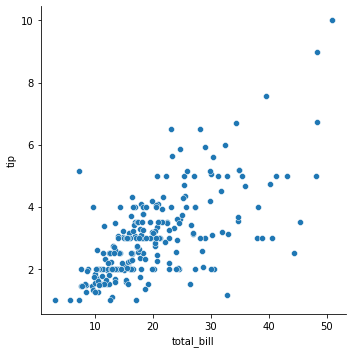

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips)

We may, of course, be interested in more than just the x- and y- values. We can use additional arguments to `relplot(...)` to distinguish data points

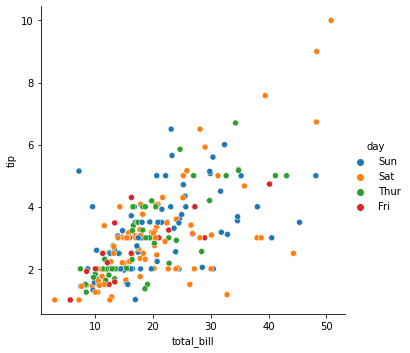

In [4]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

Points are now colored differently depending on whether the entry in the dataset corresponds to a smoker or not. We can do the same for the size and style aesthetics as well.

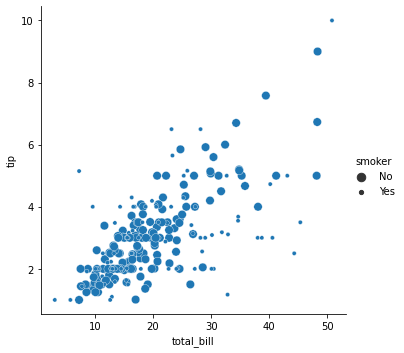

In [5]:
sns.relplot(x="total_bill", y="tip", size="smoker", data=tips)

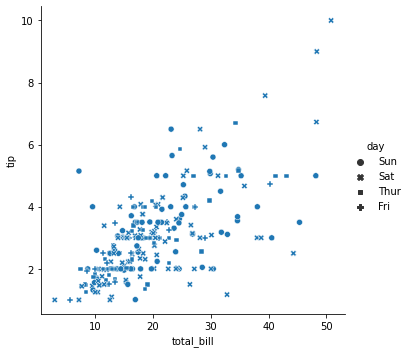

In [6]:
sns.relplot(x="total_bill", y="tip", style="day", data=tips)

The aesthetic mappings can be combined as desired to visualize up to 5 dimensions in our datasets via the `x`, `y`, `hue`, `style`, and `size` arguments.

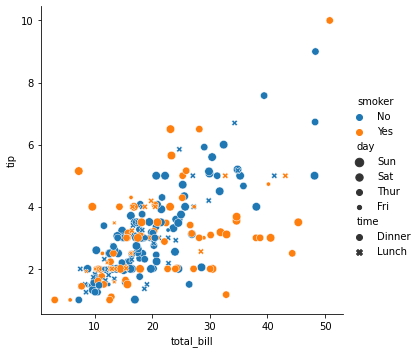

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="day", style="time", data=tips)

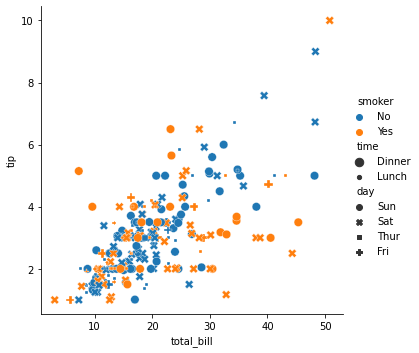

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="day",size="time", data=tips)

Be warned that this will make plots extremely difficult to visualize parse.

The `hue` and `size` aesthetics have been categorical so far, meaning that distinct colors and sizes were chosen for each possible, discrete value of the dataframe columns they were applied to. They can also be applied to continuous, numerical variables. In this case, the color palette will automatically be set to a gradient. We will see further on how to customize colors.

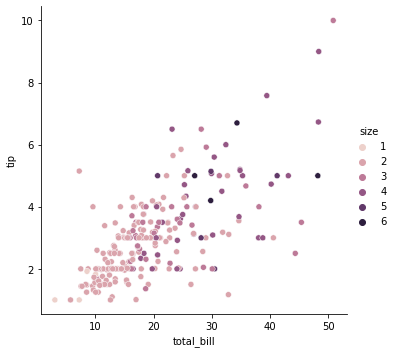

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

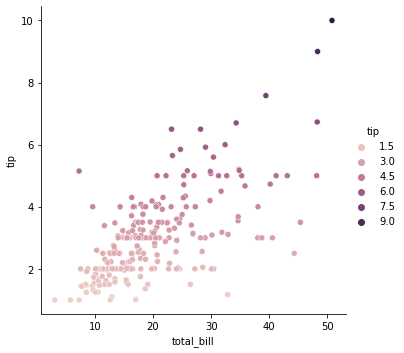

In [10]:
sns.relplot(x="total_bill", y="tip", hue="tip", data=tips)

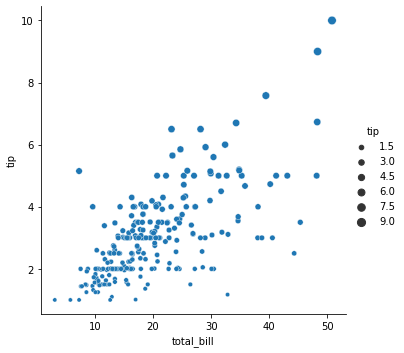

In [11]:
sns.relplot(x="total_bill", y="tip", size="tip", data=tips, kind="scatter")

### Line plots
By default, `seaborn` will create a scatterplot. In the case of time series, we may be interested in creating a line plot to better visualize trends. We can do this by simply adding a `kind="line"` argument (by default, this argument is `kind="scatter"`).

In [12]:
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum()}) #cumsum() function = compute the cumulative sum of array elements
df

,time,value
0,0,0.823579
1,1,-0.025246
2,2,-1.268669
3,3,-0.380099
4,4,-0.562915
...,...,...
495,495,8.927058
496,496,8.630507
497,497,7.913597
498,498,8.478880


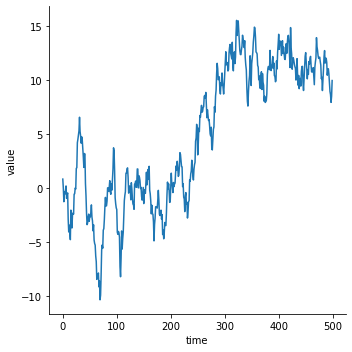

In [13]:
sns.relplot(x="time", y="value", kind="line", data=df)

By default, the dataframe will be sorted so that the x-values are in ascending order. This ensures that the line plot looks like a timeseries plot. This can, however, be disabled by setting `sort=False`. This could be useful, for example, if we are following the movement of an object or tracking how two variables change simultaneously through time.

In [14]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df

,x,y
0,-0.209681,-1.524136
1,2.242271,-0.587604
2,2.279498,-1.104615
3,1.714963,-0.175277
4,1.346600,0.445902
...,...,...
495,6.939596,26.976889
496,7.687151,26.742697
497,7.115776,25.784092
498,5.026543,25.362320


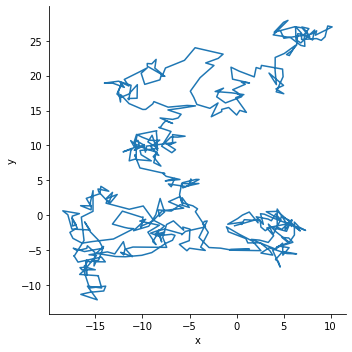

In [15]:
sns.relplot(x="x", y="y", sort=False, kind="line", data=df) #sort x ascending=false

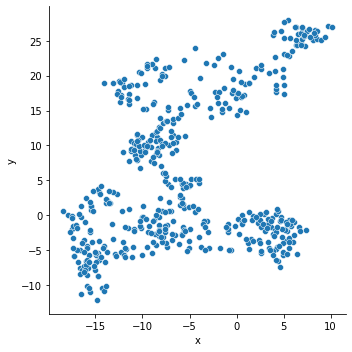

In [16]:
sns.relplot(x="x", y="y", data=df) #sort x ascending=false

Line plots have the same aesthetic mapping possibilities as scatter plots, `hue`, `size`, and `style`, and they can also be combined in the same way. Notice how multiple lines are created and only points with the identical mapped aesthetics are connected. That means, if we create a line plot that maps a variable to `hue` and to `style`, we will end up with an individual line for each existing combination of variables in our data.

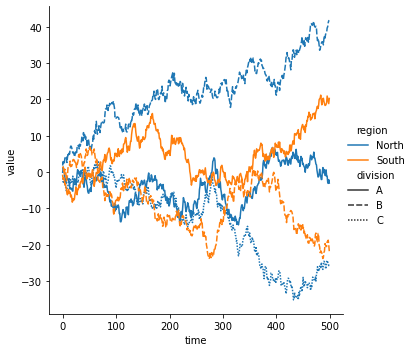

In [17]:
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "A"})
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "B"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "North", "division": "C"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "A"}))
df = df.append(pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum(), 
    "region": "South", "division": "B"}))
df = df.reset_index()# if face error problems with index

sns.relplot(x="time", y="value", kind="line", hue="region", style="division", data=df)

In [18]:
df.tail()

,index,time,value,region,division
2495,495,495,-19.222844,South,B
2496,496,496,-19.079107,South,B
2497,497,497,-18.755483,South,B
2498,498,498,-20.069609,South,B
2499,499,499,-21.778000,South,B


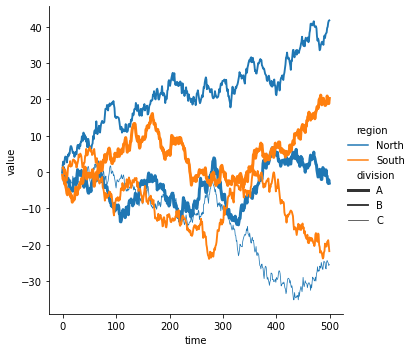

In [19]:
# Using size instead of style
sns.relplot(x="time", y="value", kind="line", hue="region", size="division", data=df)

If using the `style` parameter, we can also decide whether we want dashes, dots, or both.

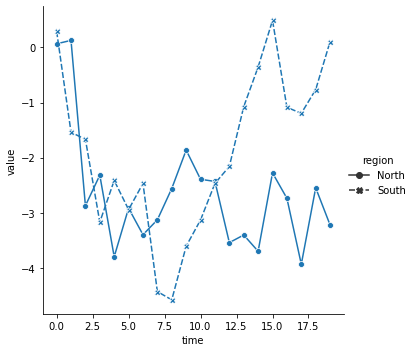

In [20]:
df = pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "North"})
df = df.append(pd.DataFrame({
    "time": np.arange(20),
    "value": np.random.randn(20).cumsum(), 
    "region": "South"}))
df = df.reset_index()

sns.relplot(x="time", y="value", kind="line", style="region", markers=True, data=df)

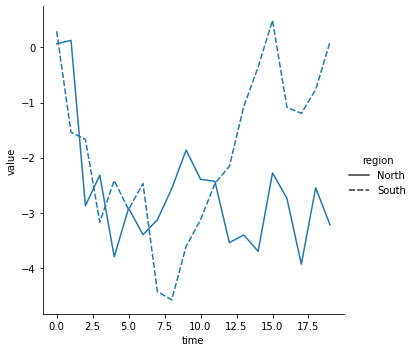

In [21]:
sns.relplot(x="time", y="value", kind="line", style="region", dashes=True, data=df)

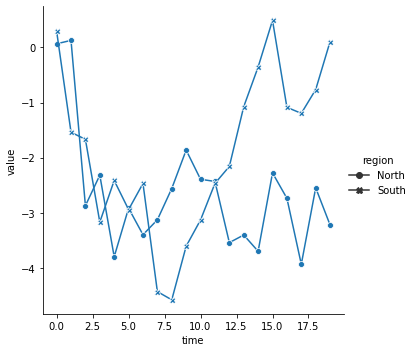

In [22]:
sns.relplot(x="time", y="value", kind="line", style="region", dashes=False, markers=True, data=df)

#### Aggregating Data
Often, we may have data with multiple measurements for the same data point, i.e. x-value. For example, we might have several temperature sensors in a device as a failsafe. `seaborn` can automatically aggregate y-values for identical x-values. By default, it plots the mean and the 95% confidence interval around this mean in either direction.

In [23]:
fmri = pd.read_csv("../data/fmri.csv")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [24]:
fmri.loc[(fmri["timepoint"] == 18)].head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513


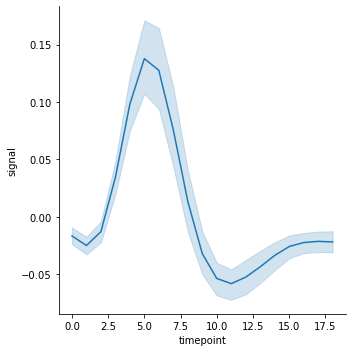

In [25]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri) # by default the estimator = np.mean

Because `seaborn` uses bootstrapping to compute the confidence intervals and this is a time-consuming process, it may be better to either switch to the **standard deviation (`ci="sd"`) or turn this off entirely and only plot the mean (`ci=None`)**

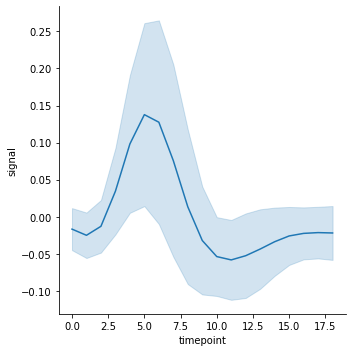

In [26]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri) #confidence interval=standard deviation

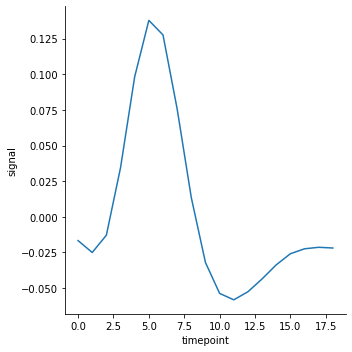

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri) #no standard deviation, mean

We can also change our `estimator` to any aggregation function, **such as `np.median(...)`, `np.sum(...)`, or even `np.max(...)`.** If we want to turn off aggregation then we just set `estimator=None`. Note that this will plot all measurements and cause the data to be plotted in strange ways.

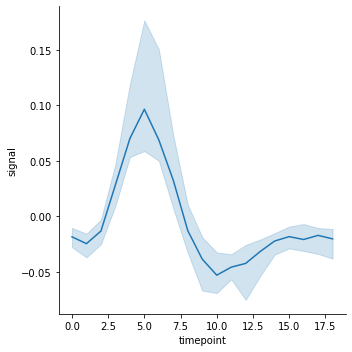

In [28]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=np.median, data=fmri) #change estimator to median

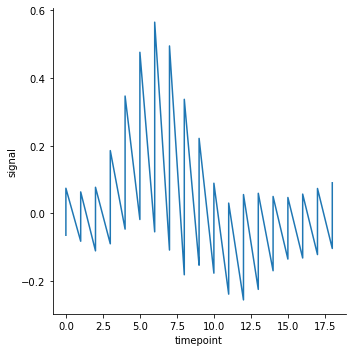

In [29]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri) #change estimator to none

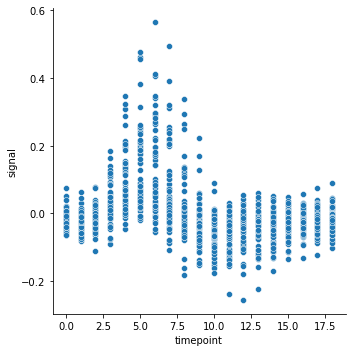

In [30]:
sns.relplot(x="timepoint", y="signal", kind="scatter", estimator=None, data=fmri) #change to scatter plot

#### Plotting Dates
Because they're so ubiquitous, `seaborn` natively supports the date format and will automatically format plots accordingly.

In [31]:
pd.date_range("2022-1-1", periods=5) #start, stop after 5 period

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range("1-1-2022", "22-3-2022") #start, stop

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [33]:
df = pd.DataFrame({
    "time": pd.date_range("2022-1-1", periods=500),
    "value": np.random.randn(500).cumsum()})
df.head()

,time,value
0,2022-01-01,-0.862822
1,2022-01-02,-1.239821
2,2022-01-03,-1.887921
3,2022-01-04,-0.832165
4,2022-01-05,-0.513953


In [34]:
df.tail()

,time,value
495,2023-05-11,-41.965370
496,2023-05-12,-42.758448
497,2023-05-13,-41.881603
498,2023-05-14,-42.091967
499,2023-05-15,-42.493409


In [35]:
df

,time,value
0,2022-01-01,-0.862822
1,2022-01-02,-1.239821
2,2022-01-03,-1.887921
3,2022-01-04,-0.832165
4,2022-01-05,-0.513953
...,...,...
495,2023-05-11,-41.965370
496,2023-05-12,-42.758448
497,2023-05-13,-41.881603
498,2023-05-14,-42.091967


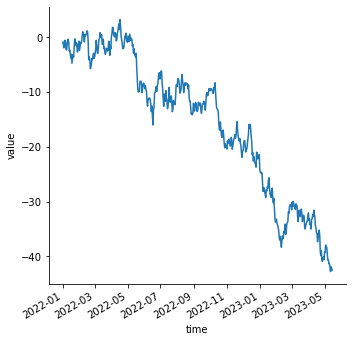

In [36]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Exercises
1. Load the `iris.csv` dataset and **create a scatter plot relating the petal length to the petal width.**

<img src="../images/Iris.png" width=500>

In [37]:
### 

In [38]:
iris = pd.read_csv("../data/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


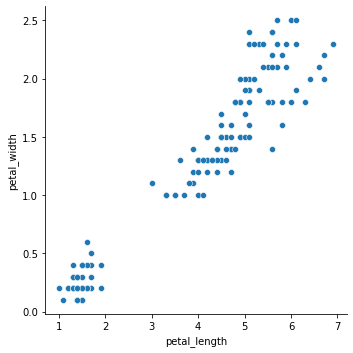

In [39]:
sns.relplot(x="petal_length", y="petal_width", data=iris)

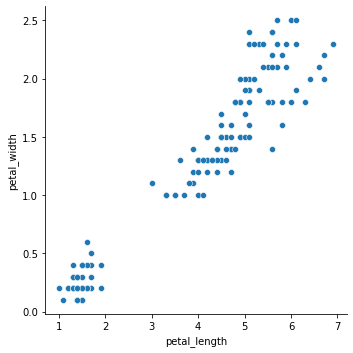

In [40]:
#2024
sns.relplot(x="petal_length", y="petal_width", kind="scatter", data=iris)

2. Load the `diamonds.csv` dataset. Plot the **carats versus the price** again, but this time make sure that points are **colored based on the cut.**

In [41]:
###

In [42]:
diamonds = pd.read_csv("../data/diamonds.csv")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


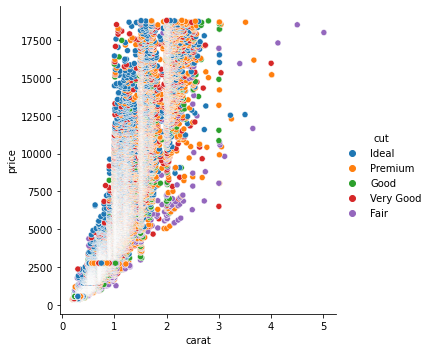

In [43]:
#2024 #sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.relplot(x="carat", y="price", hue="cut", data=diamonds)

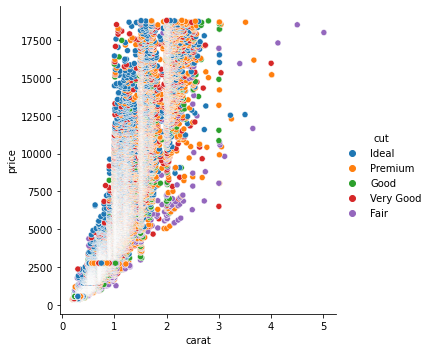

In [44]:
sns.relplot(x="carat", y="price", hue="cut",data=diamonds)

3. Load the `mpg.csv` dataset and create a **line plot relating the mean `mpg` to the `model_year`.** Make sure each country of **`origin` is shown in a separate line** style.

In [45]:
###

In [46]:
mpg = pd.read_csv("../data/mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


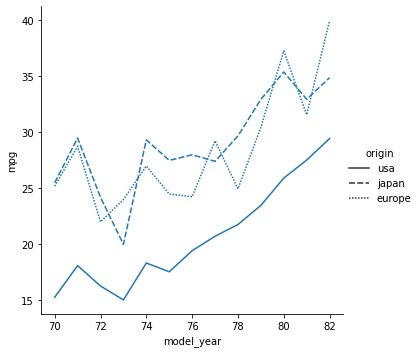

In [47]:
#2024
sns.relplot(x="model_year", y="mpg", kind="line", style="origin", dashes=True, data=mpg, ci=None)

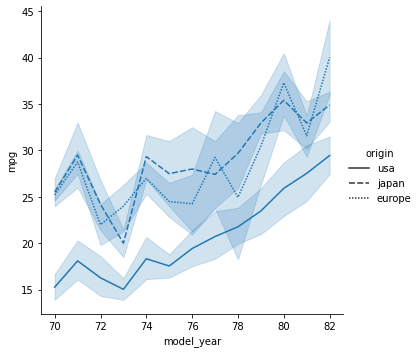

In [48]:
sns.relplot(x="model_year", y="mpg", style="origin",kind="line",data=mpg)

4. This time, use `pandas` to find the mean `mpg` value for each `model_year` and each country of `origin`. Create a line plot relating the mean `mpg` to the `model_year` with one line for each country of `origin`, as above.

  *Hint*: Remember `groupby`? Remember how we can use it for multiple columns simultaneously?
  
  *Note*: `seaborn` cannot use the index, even if it is named. You must use `*.reset_index()` to ensure that the columns you grouped by are columns in the new data frame

In [49]:
### sns.relplot(x="timepoint", y="signal", kind="line", ci="sd"/None, data=fmri)

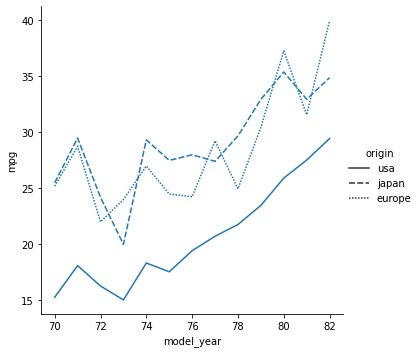

In [50]:
sns.relplot(x="model_year", y="mpg", style="origin",kind="line",ci=None,data=mpg)

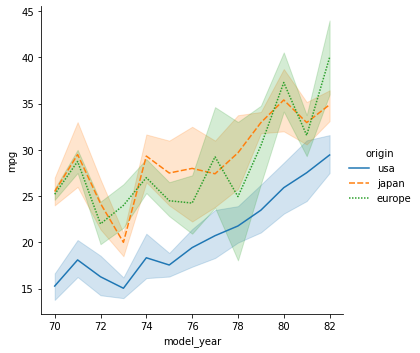

In [51]:
sns.relplot(x="model_year", y="mpg", kind="line", style="origin", hue="origin", data=mpg)

5. Consider the following (fake) stock data. Create a line plot from this data with one line for each stock symbol and format the x-axis as a date.

In [52]:
# MC
mpg = pd.read_csv("../data/mpg.csv")
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [53]:
#MC
mpg_mean = mpg.groupby(["model_year", "origin"])["mpg"].mean()
mpg_mean.head(5)

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
Name: mpg, dtype: float64

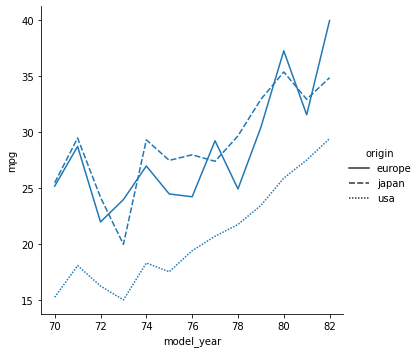

In [54]:
#MC
mpg_mean = mpg_mean.reset_index() #reset_index() method sets a list of integer ranging from 0 to length of data as index.
#print (mpg_mean.head(10))
sns.relplot(data=mpg_mean, x="model_year", y="mpg", kind="line", style="origin")

5. Consider the following (fake) stock data. Create a line plot from this data with **one line for each stock symbol and format the x-axis as a date.**

In [55]:
###
np.random.seed(101)
stock_data = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "TRDS"})
stock_data = stock_data.append(pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum(), 
    "symbol": "RISL"}))
stock_data.head(3)

,time,value,symbol
0,2017-01-01,2.706850,TRDS
1,2017-01-02,3.334983,TRDS
2,2017-01-03,4.242952,TRDS


In [56]:
stock_data.tail(3)

,time,value,symbol
497,2018-05-13,14.105159,RISL
498,2018-05-14,14.751203,RISL
499,2018-05-15,14.390096,RISL


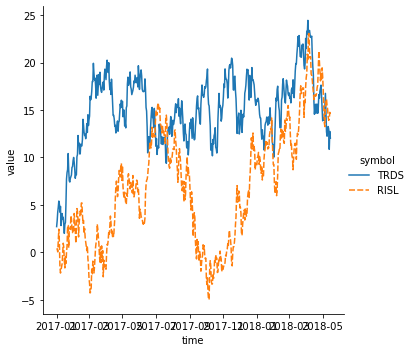

In [57]:
#2024
stock_data = stock_data.reset_index()
sns.relplot(x="time", y="value", kind="line", style="symbol", hue="symbol", data=stock_data)

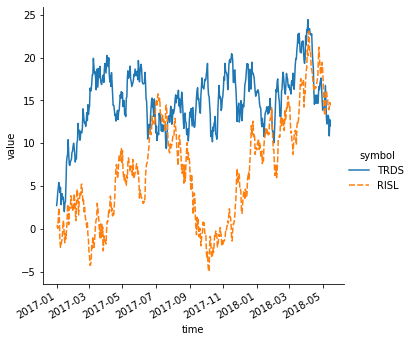

In [58]:
#g = sns.relplot(x="time", y="value", kind="line", data=df)
#g.fig.autofmt_xdate()
#2024
stock_data = stock_data.reset_index()

stock = sns.relplot(x="time", y="value", kind="line", style="symbol", hue="symbol", data=stock_data)
stock.fig.autofmt_xdate()

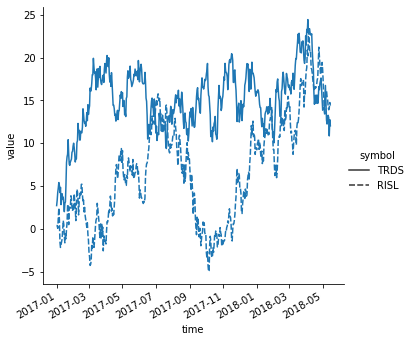

In [59]:
#stock_data = stock_data.reset_index()

s = sns.relplot(x="time", y="value", kind="line", style="symbol", data=stock_data)
s.fig.autofmt_xdate()

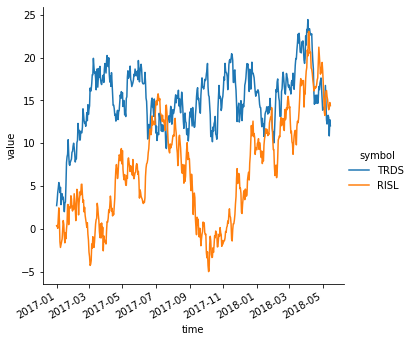

In [60]:
s = sns.relplot(x="time", y="value", kind="line", hue="symbol", data=stock_data)
s.fig.autofmt_xdate()

## Relationships to Categorical Variables
We've already seen how we can show dependence on categorical variables with the various aesthetics in the previous section (`hue`, `size`, and `style`). Often, we may not have two continuous variables to relate to each other, though. For this, we use the `seaborn` function `catplot(...)` which can create multiple kinds of categorical plots.

<img src="../images/CatNum.png" width=600>

<img src="../images/plot.png" width=600>

### Categorical Scatter Plots
The simplest way to represent the relationship between continuous and categorical data is with a categorical scatter plot that represents the distribution of (continuous) values for each category. For this, we can make use of the default value `kind="strip"`.

In [61]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


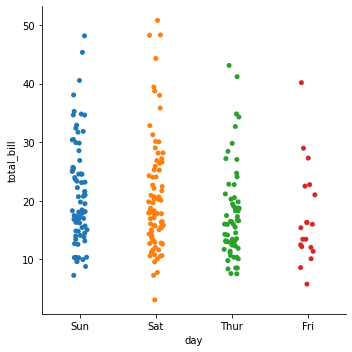

In [62]:
sns.catplot(x="day", y="total_bill", data=tips)

`seaborn` automatically adds jitter to the points to reduce their overlap. We can adjust this jitter by passing a value between 0 and 1 (exclusive) or eliminate this jitter entirely by passing a boolean `False`. Note that a value of 1 is interpreted as `True` and the default jitter width is used!

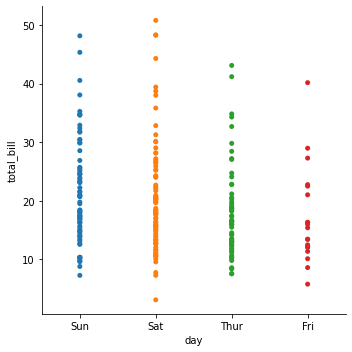

In [63]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

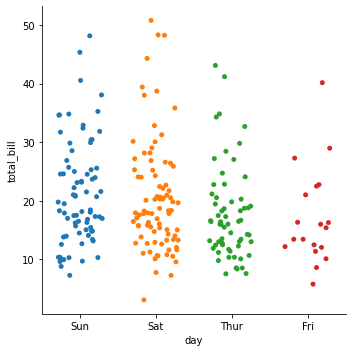

In [64]:
# When a number is passed, this corresponds to a relative width
# jitter=0.5 will typically mean that the "point columns" touch.
sns.catplot(x="day", y="total_bill", jitter=0.3, data=tips)

We can also prevent point overlap entirely by using a swarm plot. This will create a useful visual approximateion of the distribution of the values.

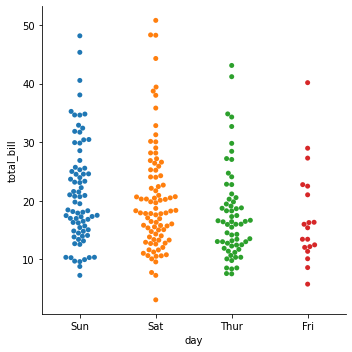

In [65]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

Categorical plots only support the `hue` aesthetic, not the `style` or `size` aesthetics.

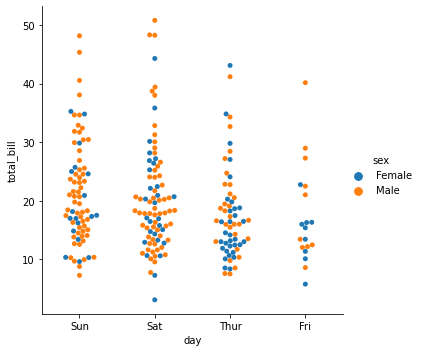

In [66]:
sns.catplot(x="day", y="total_bill", kind="swarm", hue="sex", data=tips)

`seaborn` will make assumptions on the nature of your data. For example, if you pass two continuous, numerical variables to `catplot(...)`, it will try to treat the x-axis as a categorical variable.

C:\Users\farah\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


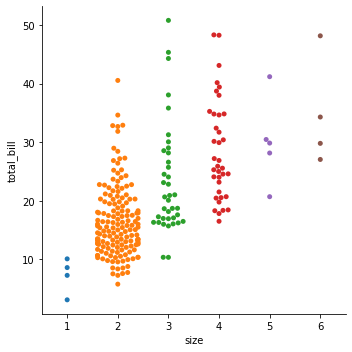

In [67]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

C:\Users\farah\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\farah\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


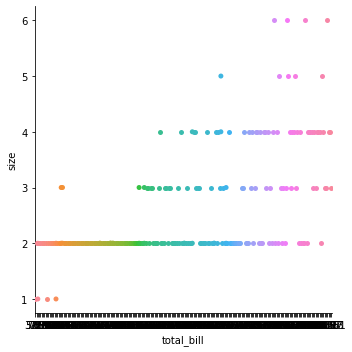

In [68]:
sns.catplot(x="total_bill", y="size", kind="swarm", data=tips)

Notice that this will break `seaborn` if you attempt to place to pseudo-categorical variable onto the y-axis. We can, however, invert our axes if one of the variables is truly categorical, i.e. not numerical.

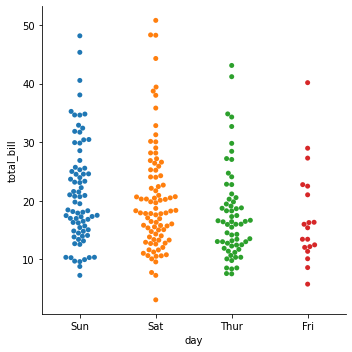

In [69]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

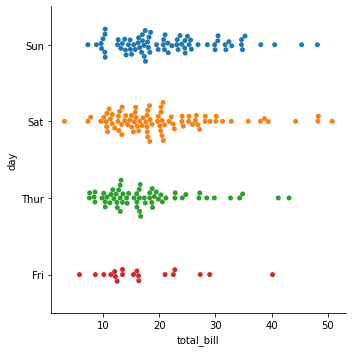

In [70]:
sns.catplot(x="total_bill", y="day", kind="swarm", data=tips)

### Box Plots
Swarm plots are good for approximating distributions, but we often want to have an exact description of the data distribution. For this, we can use box plots and variants thereof.

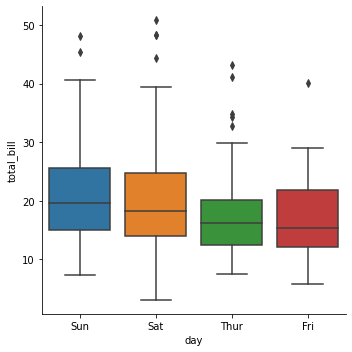

In [71]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Boxplots encode valuable information about our distribution. For each subset of the data, i.e. each box, the following pieces of information are shown:
- The central line of each box represents the median value
- The top and bottom of the boxes are the $3^{rd}$ and $1^{st}$ quantile, respectively.
    - This means that 25% of all values are below the bottom line and 25% are above the top line, i.e. 50% of all values are within the colored region
- The whiskers denote the outlier limits. Any value between the whiskers is considered "normal"
- The points outside of the whiskers are outliers that may require special attention

The `hue` argument can be used to show additional, nested relationships

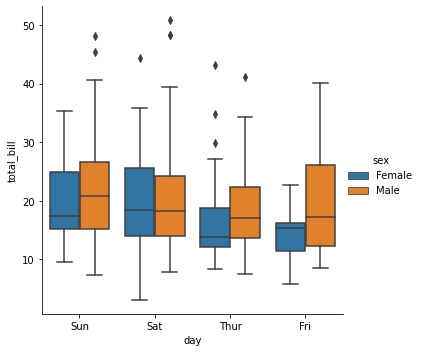

In [72]:
sns.catplot(x="day", y="total_bill", kind="box", hue="sex", data=tips)

Note that `hue` assumes a categorical variable when used on `catplot(...)` and `seaborn` will therefore automatically convert numerical variables into categorical ones.

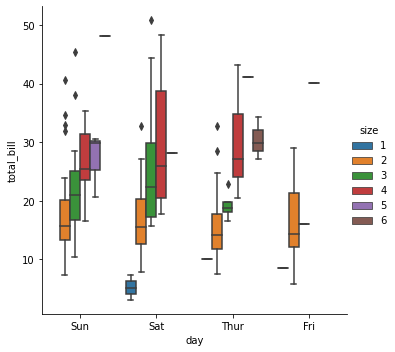

In [73]:
sns.catplot(x="day", y="total_bill", kind="box", hue="size", data=tips)

### Violin Plot

When quantiles aren't enough, `seaborn` can also display a violin plot. 
This kind of plot estimates a density and plots it as a distribution
For more information on violin plots https://towardsdatascience.com/violin-plots-explained-fb1d115e023d 

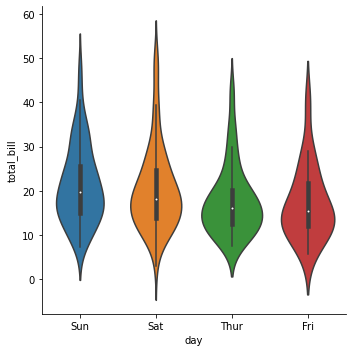

In [74]:
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)

If a variable has only two possible values and is mapped to the hue aesthetic, then `split=True` can be used to combine the two density estimates to compare them more easily.

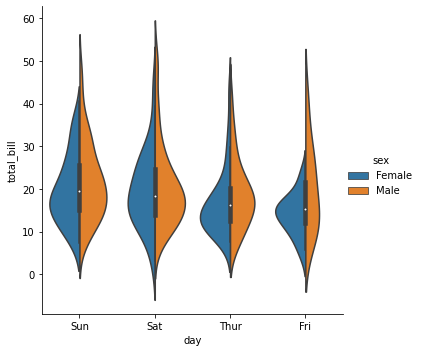

In [75]:
sns.catplot(x="day", y="total_bill", kind="violin", hue="sex", split=True, data=tips)

Violin plots estimate the density. This kernel density estimator (KDE) requires a parameter, called bandwidth, that determines how smooth or how detailed the density plot will be. Understanding violin plots can therefore be more difficult and potentially misleading.

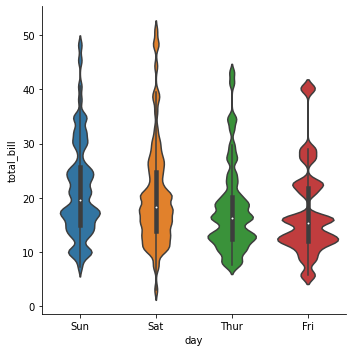

In [76]:
sns.catplot(x="day", y="total_bill", kind="violin", bw=0.1, data=tips)

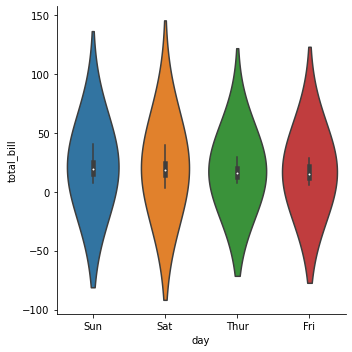

In [77]:
sns.catplot(x="day", y="total_bill", kind="violin", bw=5, data=tips)

Violin plots automatically show the corresponding box plot stats inside. We can change this to either showing `sticks`, `points`, or nothing at all.

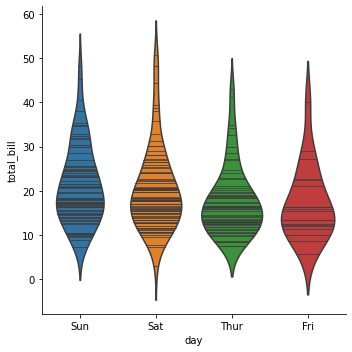

In [78]:
sns.catplot(x="day", y="total_bill", kind="violin", inner="stick", data=tips)

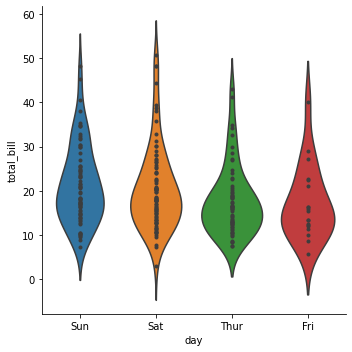

In [79]:
sns.catplot(x="day", y="total_bill", kind="violin", inner="points", data=tips)

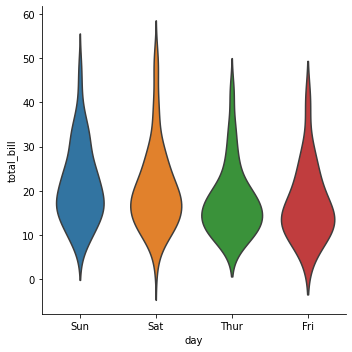

In [80]:
sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)

### Bar Plot
Like with line plots, we may be interested in summary statistics over our data. 
For this, we can use a bar plot. `seaborn` will compute a summary statistic, such as the mean, as well as confidence intervals for each individual category (denoted by the x-axis).

In [81]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


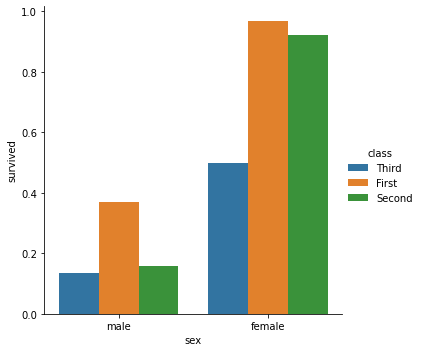

In [82]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", ci=None, data=titanic) #mean

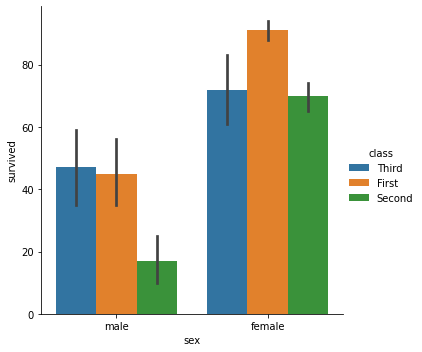

In [83]:
# Compute the total number of survivors for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", estimator=np.sum, data=titanic) #sum

If we're just interested in counting the number of occurances of a single variable, we can use `kind="count"`.

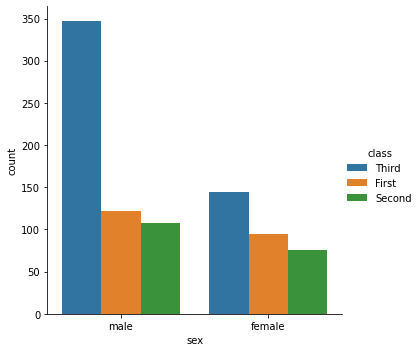

In [84]:
# Count the number of passengers by sex and class
sns.catplot(x="sex", hue="class", kind="count", data=titanic) #count all passengers

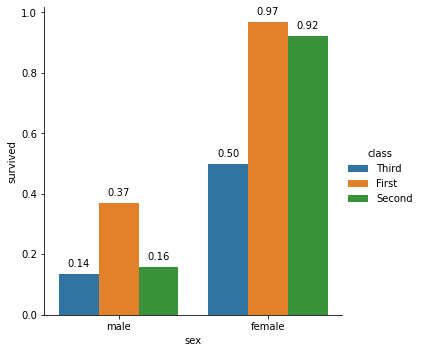

In [85]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
g = sns.catplot(x="sex", y="survived", hue="class", kind="bar", ci=None, data=titanic) #mean

# to plot the values for each bar
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
#Every bar (and its corresponding background area) is known as a patch within the bar chart object. 
#Therefore, we create a loop iterating through every patch within patches
#For more details, pls refer to https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6 

An alternative to a barplot is a "point plot", which connects groups. This can be used to track pseudo-timeseries data that may only have a few categorical time points, e.g. sales data for 5 years. Notice how it connects data subgroups with the same value of the variable mapped to the `hue` aesthetic (`sex`).

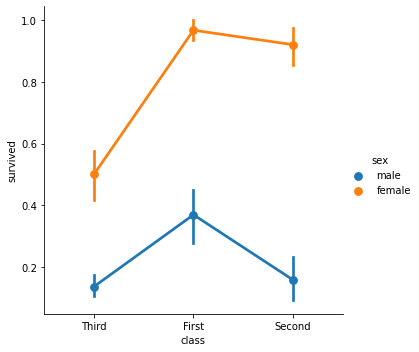

In [86]:
sns.catplot(x="class", y="survived", hue="sex", kind="point", data=titanic)

As before, we can also change the estimator and confidence interval method for point plots.

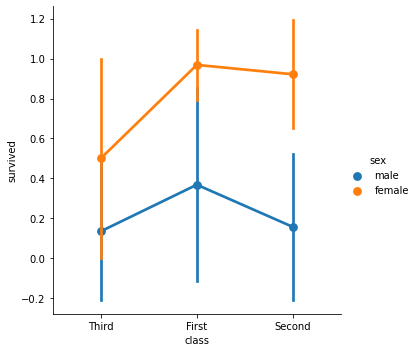

In [87]:
sns.catplot(x="class", y="survived", hue="sex", kind="point", estimator=np.mean, ci="sd", data=titanic) 
#estimator is actually already default np.mean...confidence interval=sd

### Exercises

1. Load the `diamonds.csv` dataset and create a categorical scatter plot that relates the price to the cut

In [125]:
#
diamonds = pd.read_csv("../data/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


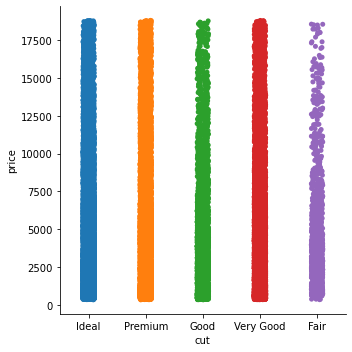

In [126]:
sns.catplot(x="cut", y="price", data=diamonds)

2. Change the jitter width of the previous plot so that the dot-columns are touching.

In [92]:
###

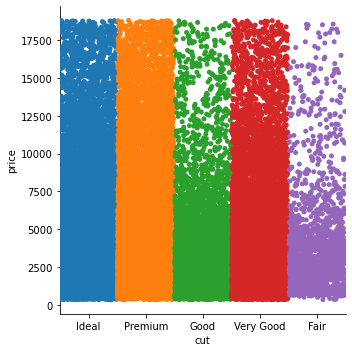

In [132]:
sns.catplot(x="cut", y="price", jitter=0.49, data=diamonds)

3. This time, create a box plot that relates the carats to the clarity

In [94]:
#### 

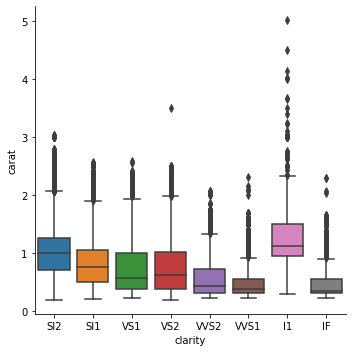

In [133]:
sns.catplot(x="clarity", y="carat", kind="box", ci=None, data=diamonds)

4. Create a subset of the diamonds data consisting of only diamonds with colors of "J" (worst) and "D" (best) and only with clarity "IF". 
  
  *Hint:* We can combine boolean masks for Pandas like so: `diamonds.loc[(condition1) & (condition2)]`
  
  Create a violin plot relating the price to the clarity and map the color to the `hue` aesthetic. Make sure the density estimates for each color are combined in each violin.

In [96]:
## 

In [134]:
diamonds
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [98]:
diamonds_D = diamonds.loc[
    (diamonds.color == "D")  & (diamonds.clarity == 'IF'), 
    ['color','clarity']]
diamonds_D.head()

,color,clarity
3342,D,IF
3343,D,IF
3680,D,IF
3682,D,IF
3971,D,IF


In [135]:
diamonds_J = diamonds.loc[
    (diamonds.color == "J")  & (diamonds.clarity == 'IF'), 
    ['color','clarity']]
diamonds_J.head()

,color,clarity
3734,J,IF
3735,J,IF
4699,J,IF
12861,J,IF
13385,J,IF


In [136]:
diamonds_JD = diamonds_D.append(diamonds_J)
diamonds_JD

,color,clarity
3342,D,IF
3343,D,IF
3680,D,IF
3682,D,IF
3971,D,IF
...,...,...
49026,J,IF
49720,J,IF
50458,J,IF
50557,J,IF


In [137]:
diamonds_DJ = diamonds.loc[((diamonds.color == "J")|(diamonds.color == "D")) & (diamonds.clarity == 'IF')]
diamonds_DJ

,carat,cut,color,clarity,depth,table,price,x,y,z
3342,0.50,Good,D,IF,63.2,59.0,3378,4.99,5.04,3.17
3343,0.50,Very Good,D,IF,62.9,59.0,3378,4.99,5.09,3.17
3680,0.51,Ideal,D,IF,62.0,56.0,3446,5.14,5.18,3.20
3682,0.51,Ideal,D,IF,62.1,55.0,3446,5.12,5.13,3.19
3734,0.35,Ideal,J,IF,61.8,55.0,569,4.54,4.56,2.81
...,...,...,...,...,...,...,...,...,...,...
50671,0.34,Ideal,D,IF,62.1,57.0,2287,4.46,4.52,2.79
50672,0.34,Ideal,D,IF,59.8,57.0,2287,4.57,4.59,2.74
51173,0.34,Ideal,D,IF,62.1,57.0,2346,4.52,4.46,2.79
51174,0.34,Ideal,D,IF,59.8,57.0,2346,4.59,4.57,2.74


In [138]:
print(type(diamonds))
print(type(diamonds_JD))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


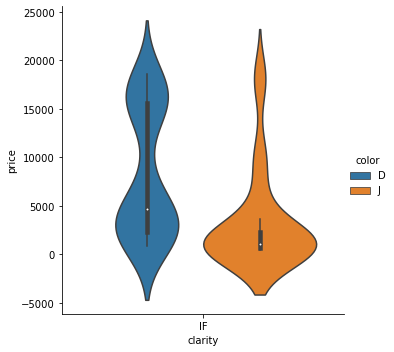

In [139]:
sns.catplot(y="price", x="clarity", kind="violin",hue="color", data=diamonds_DJ)

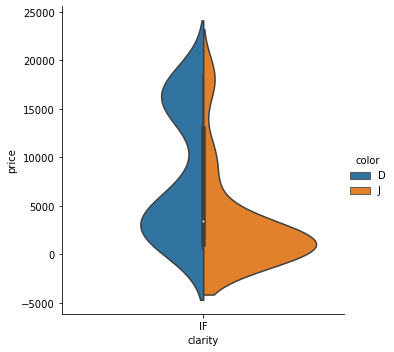

In [140]:
sns.catplot(y="price", x="clarity", kind="violin",hue="color", split=True, data=diamonds_DJ)

5. Play with the bandwidth parameter (`bw`) for the previous plot. How can you interpret the plot for `bw=0.01`, `bw=0.1`, and `bw=1`?

In [105]:
###

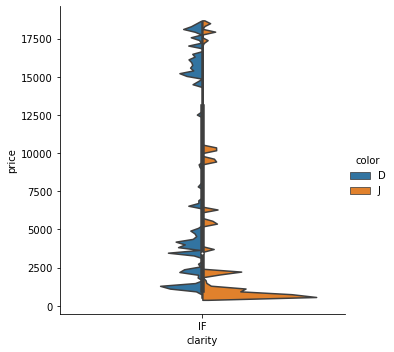

In [142]:
sns.catplot(y="price", x="clarity", kind="violin",hue="color", split=True, bw=0.01, data=diamonds_DJ)

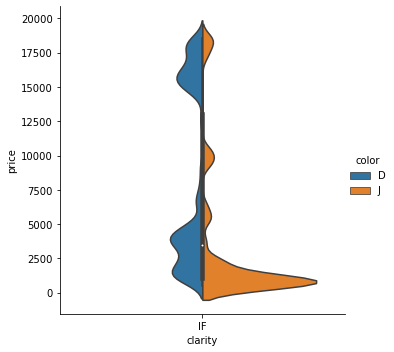

In [143]:
sns.catplot(y="price", x="clarity", kind="violin",hue="color", split=True, bw=0.1, data=diamonds_DJ)

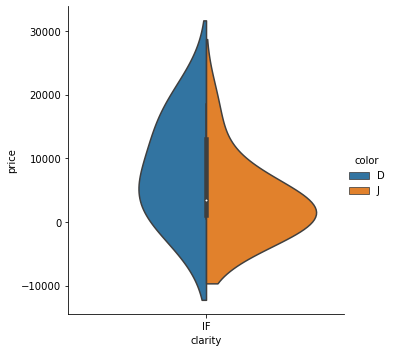

In [144]:
sns.catplot(y="price", x="clarity", kind="violin",hue="color", split=True, bw=1, data=diamonds_DJ)

6. Using the full diamond dataset again, use a bar plot to determine how many diamonds there are of each cut.

In [106]:
###

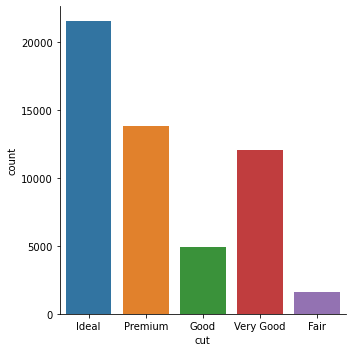

In [107]:
sns.catplot( y=None,x="cut", kind="count", data=diamonds) #or takyah letak y axis pon okay

## Element Ordering
All of the above plots allow us to customize the order of elements, both on the axes as well as for the aesthetics. Naturally, the functions will only enable ordering aesthetics that are supported, e.g. `catplot(...)` has no `size_order` or `style_order` arguments and `relplot(...)` has no `order` argument as both axes depict continuous values.

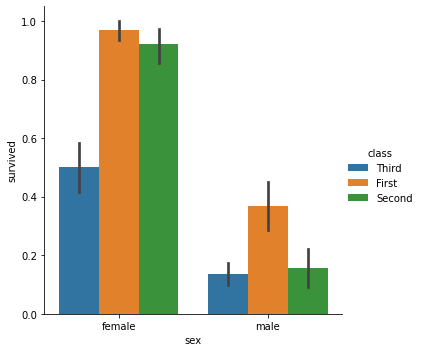

In [145]:
# Compute the mean survival rate for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], data=titanic)

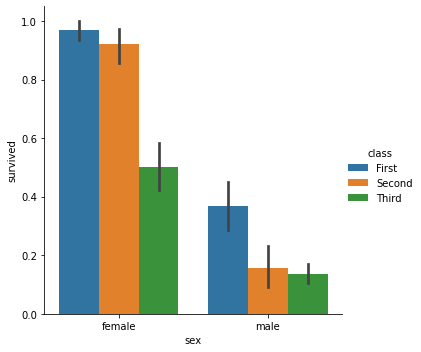

In [146]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", 
            order=["female", "male"], data=titanic, 
            hue_order=["First", "Second", "Third"])

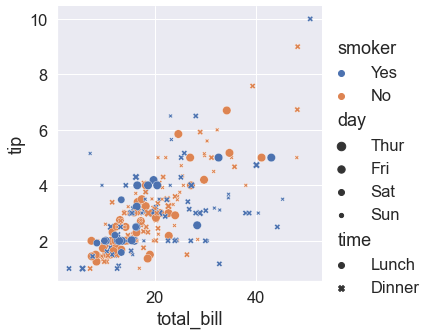

In [205]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="day", style="time",
            style_order=["Lunch", "Dinner"], 
            size_order=["Thur", "Fri", "Sat", "Sun"], 
            hue_order=["Yes", "No"], data=tips)

## Faceting 
We can also instruct the functions `relplot(...)` and `catplot(...)` to create multiple plots if we simply have too much detail to show in one. The parameters `col=...` and `row=...` let us further split apart the data and show subsets in individual plots.

In [148]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


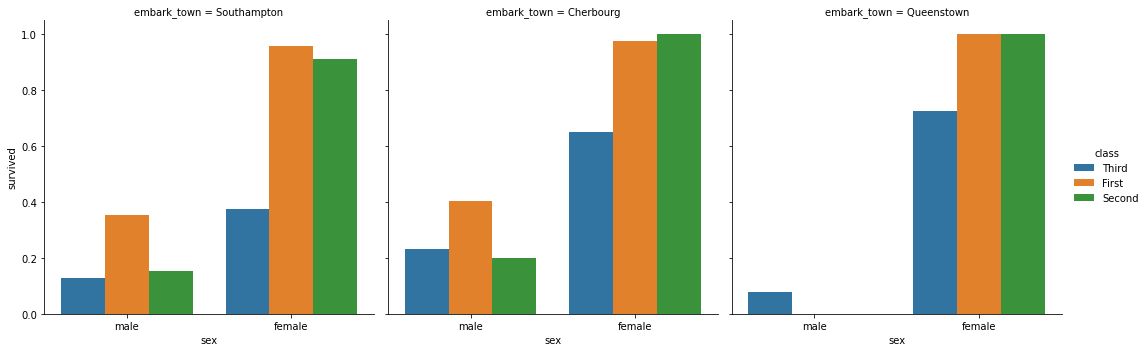

In [149]:
# Compute the total number of survivors for each sex and class as well as confidence intervals.
sns.catplot(x="sex", y="survived", hue="class", kind="bar", col="embark_town", ci= None, data=titanic)

In [113]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


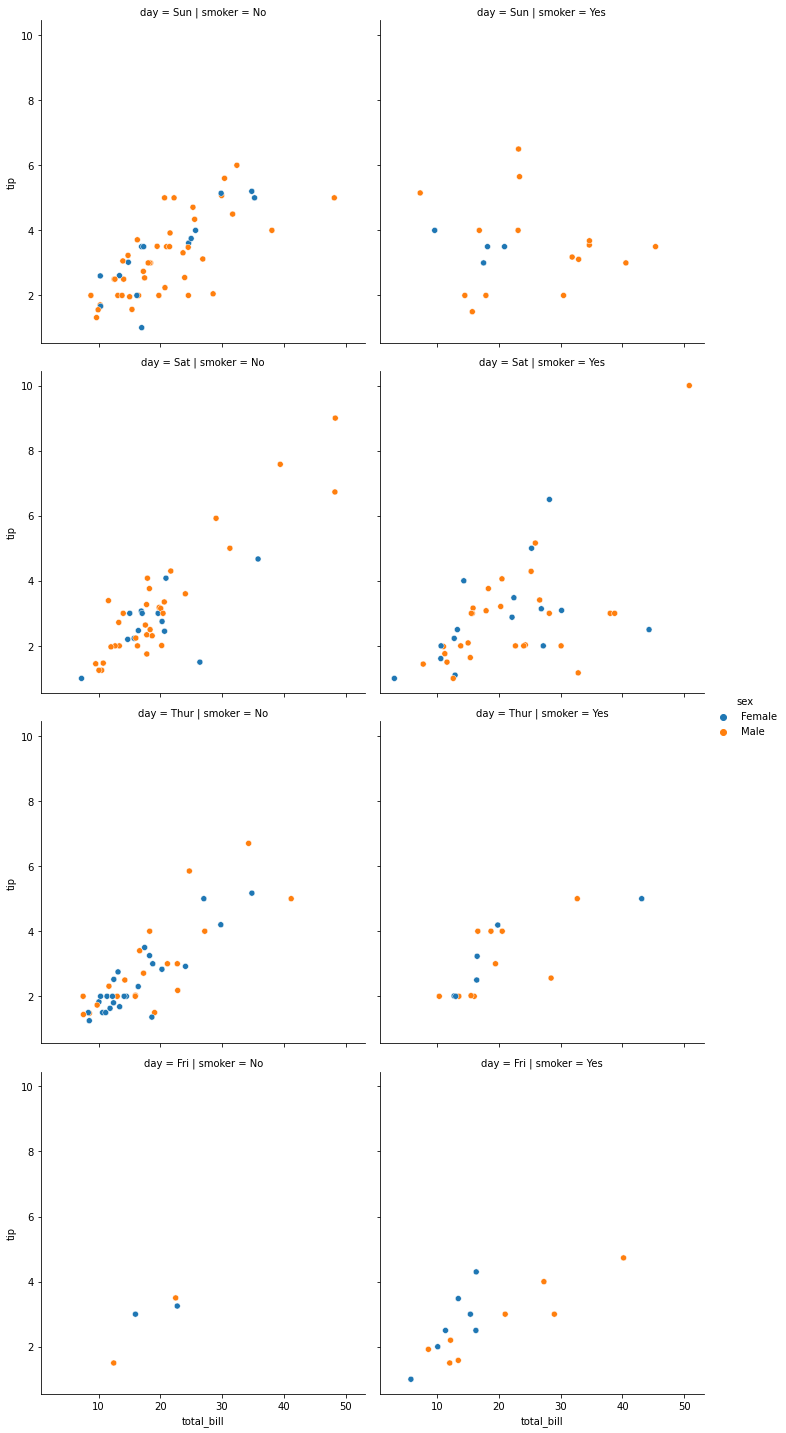

In [150]:
sns.relplot(x="total_bill", y="tip", hue="sex", row="day", col="smoker", data=tips)

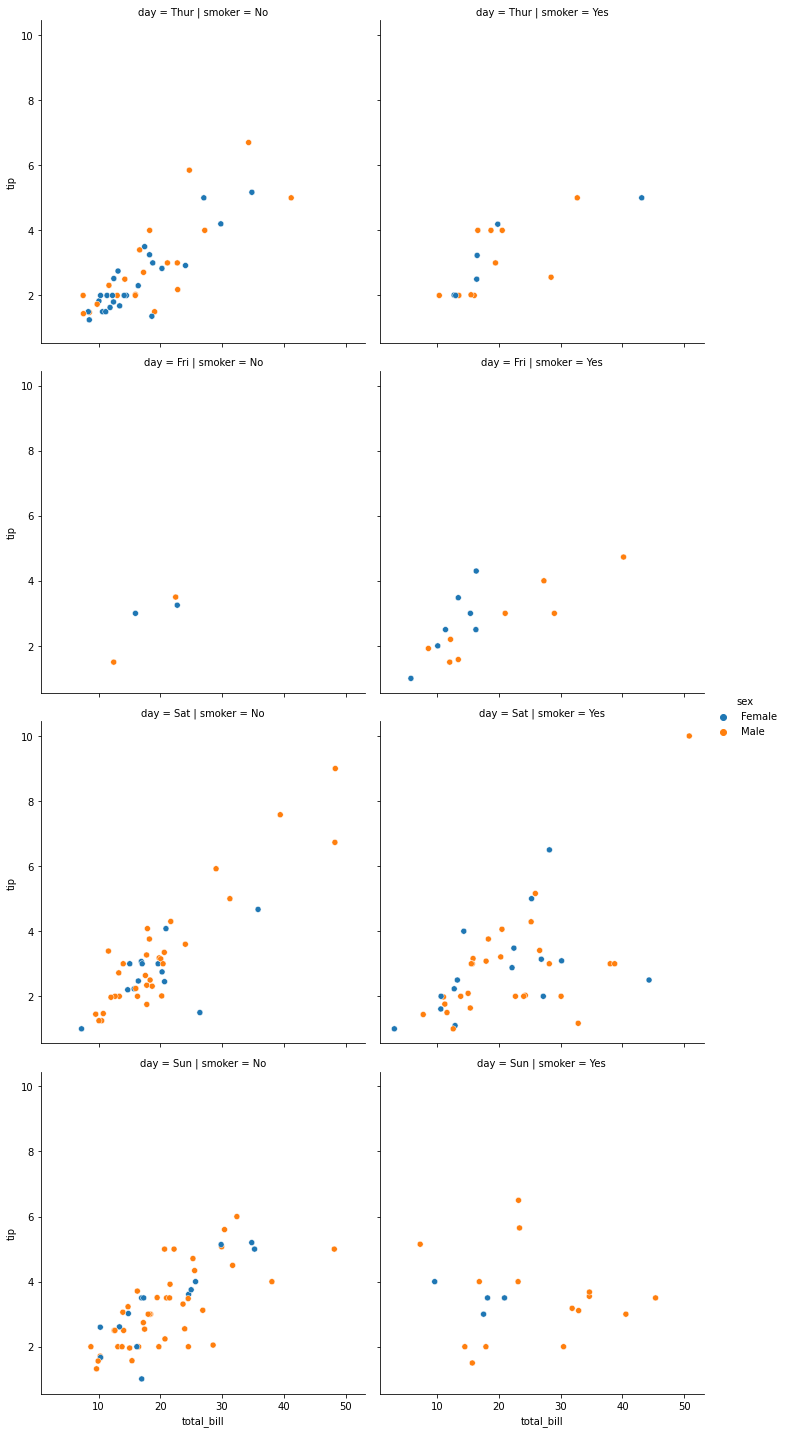

In [115]:
sns.relplot(x="total_bill", y="tip", hue="sex", row="day", col="smoker", data=tips, 
            row_order=["Thur", "Fri", "Sat", "Sun"])

## Under the Hood
`seaborn` is a high-level interface for `matplotlib`. The two functions introduced here call other, intermediate functions, which in turn call `matplotlib` functions.

- `relplot(kind=...)`
    - **scatter**: `scatterplot()` --> `matplotlib.pyplot.scatter()`
    - **line**: `lineplot()` --> `matplotlib.pyplot.line()`
- `catplot(kind=...)`
    - **strip**: `stripplot()` --> Calls multiple `matplotlib` functions
    - **swarm**: `swarmplot()` --> Calls multiple `matplotlib` functions
    - **box**: `boxplot()` --> Calls `matplotlib.pyplot.boxplot()`
    - **violin**: `violinplot()` --> Calls multiple `matplotlib` functions
    - **bar**: `barplot()` --> Calls `matplotlib.pyplot.bar()`
    - **count**: `countplot()` --> Calls `matplotlib.pyplot.bar()`
    - **point**: `pointplot()` --> Calls multiple `matplotlib` functions
    
`seaborn` is essentially a "convenience" to make `matplotlib` more accessible.

## Customizing Plots

### Plot Text and Axis Labels
Customizing the text of axis labels is unfortunately not as intuitive as building the plots. This is because `seaborn` builds heavily on `matplotlib` but attempts to reduce the fine granularity of building a plot with the latter. For example, to create the facetted plots above using `matplotlib`, we would have to subset the data into all possible variants, build each individual plot, arrange them in a grid, and then add the legend and axis titles. `seaborn` makes this step somewhat easier, but cannot get around this granularity when it comes to customizing plots.

**Title**

Text(0.5, 0.98, 'Titanic Survivors')

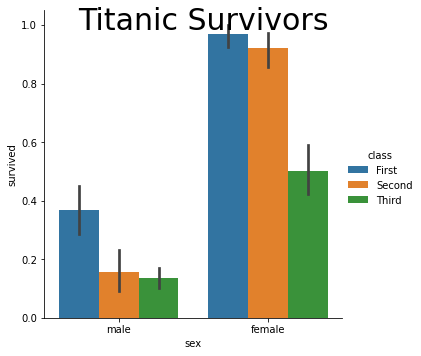

In [151]:
# Look at documentation for more info
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], data=titanic)
myFigure.fig.suptitle("Titanic Survivors", fontsize=30)

**Legend**

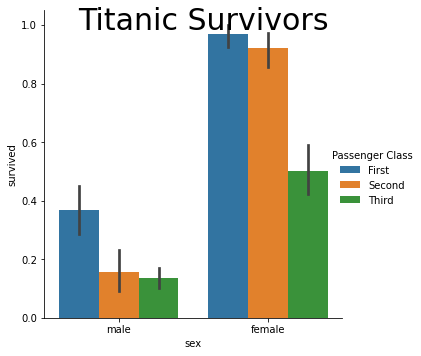

In [152]:
myFigure._legend.set_title("Passenger Class")
myFigure.fig

Legend labels are stored as `Text(...)` elements

In [153]:
myFigure._legend.texts

[Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')]

We can change these by calling `*.set_text(...)` on each of them

In [154]:
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure._legend.texts

[Text(0, 0, '1st'), Text(0, 0, '2nd'), Text(0, 0, '3rd')]

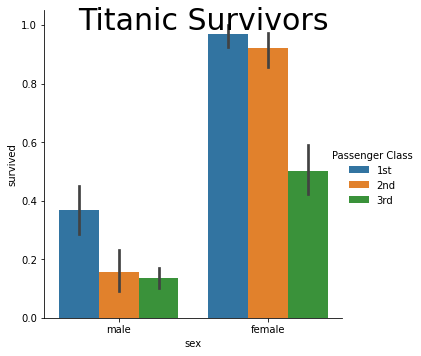

In [155]:
myFigure.fig

**Axis Labels**

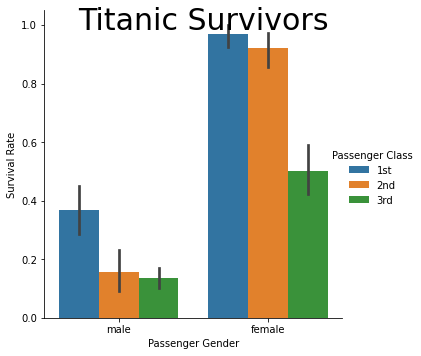

In [156]:
myFigure.set_axis_labels(x_var="Passenger Gender", y_var="Survival Rate")
myFigure.fig

We can set the value of categorical tick labels as follows:

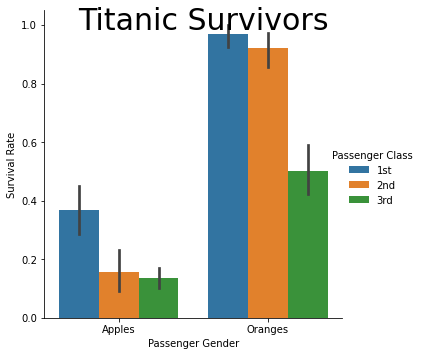

In [157]:
myFigure.set_xticklabels(labels=["Apples", "Oranges"])
myFigure.fig

**Rotate Tick Labels**

In some cases, tick labels may be too dense and must be rotated

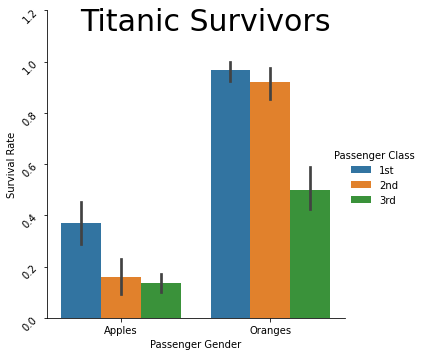

In [158]:
myFigure.set_yticklabels(rotation=45)
myFigure.fig

### Axis Limits
We use `matplotlib` to set our axis limits

(2.0, 8.0)

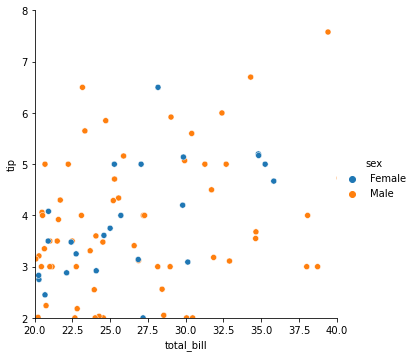

In [159]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
plt.xlim(20, 40) #limit x-axis
plt.ylim(2, 8) #limit y-axis

### Color
There are far more methods of creating and choosing color palettes in `seaborn` than could possibly be shown here.

In general, we set the colors of our plot with the parameter `palette=...`. The simplest way to do this is to define a dictionary relating the aesthetic names (here the passenger class) to colors. The colors can be given either as a string (insofar as the color is known to seaborn), in hexadecimal format indicating the color channel intensities (`#RRGGBB`), or as a tuple/list with 3 values indicating the color mixing (`[r, g, b]`, values should be between 0 and 1)

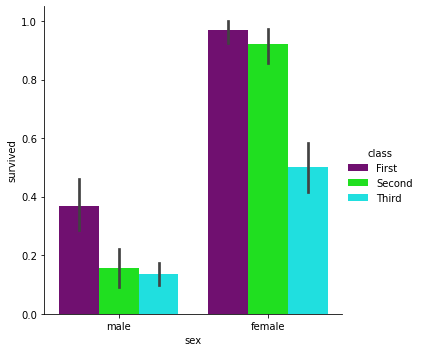

In [164]:
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=["purple", "#00FF00", (0, 1, 1)], #OR palette={"First": "purple", "Second": "#00FF00", "Third": (0, 0, 1)}
    data=titanic)

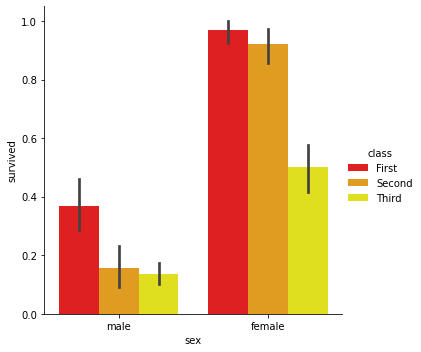

In [171]:
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    palette=["red", "orange", (1, 1, 0)],
    data=titanic)

This becomes tiresome for many categories so `seaborn` offers several functions to generate color palettes automatically. Some of these include:

- `sns.cubehelix_palette(...)`
- `sns.diverging_palette(...)`
- `sns.dark_palette(...)`
- Any of the [ColorBrewer](http://colorbrewer2.org) presets
- ... and many more

Rather than try to learn each one of these individually, though, `seaborn` offers an incredibly useful tool: interactive widgets that let you design a palette. The 5 widgets can be called via:

- sns.choose_colorbrewer_palette(...)
- sns.choose_cubehelix_palette(...)
- sns.choose_dark_palette(...)
- sns.choose_light_palette(...)
- sns.choose_diverging_palette(...)

Note that these widgets will only work in Jupyter.

In [175]:
myPalette = sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

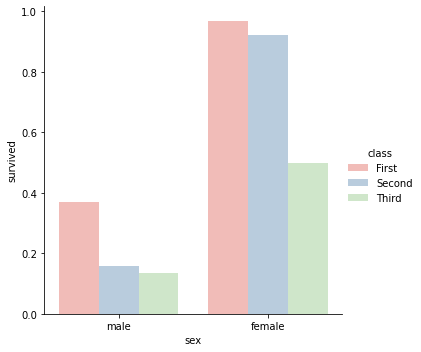

In [179]:
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar", ci=None,
    hue_order=["First", "Second", "Third"], 
    palette= myPalette,
    data=titanic)

In [178]:
myPalette2 = sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

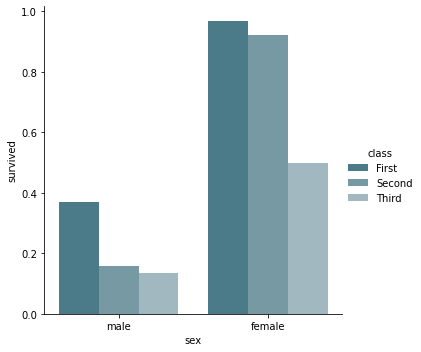

In [180]:
sns.catplot(
    x="sex", y="survived", hue="class", kind="bar", ci=None,
    hue_order=["First", "Second", "Third"], 
    palette= myPalette2,
    data=titanic)

xkcd produces a set of [954 named colors](https://xkcd.com/color/rgb/) to name random RGB colors. 

This becomes tiresome for many categories so `seaborn` offers several functions to generate color palettes automatically. Some of these include:

- `sns.cubehelix_palette(...)`
- `sns.diverging_palette(...)`
- `sns.dark_palette(...)`
- Any of the [ColorBrewer](http://colorbrewer2.org) presets
- ... and many more

For more on color palette, refer to https://seaborn.pydata.org/tutorial/color_palettes.html 

## Themes
Beyond color, `seaborn` also has support for themes. There are five built-in seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. They can be invoked with `sns.set_style(...)`

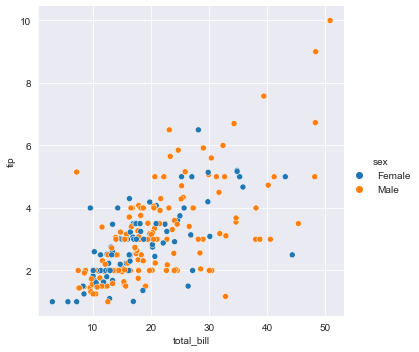

In [182]:
sns.set_style("darkgrid")
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

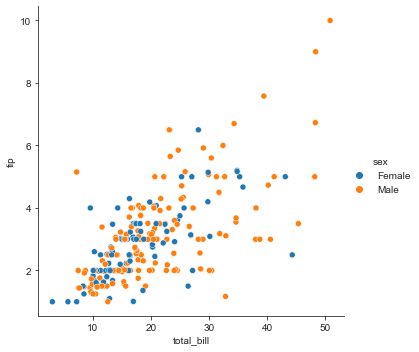

In [184]:
sns.set_style("ticks")
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

We can edit these styles to our liking. Note that the floating point numbers are actually strings!

In [185]:
# See current style details
sns.set_style("ticks")
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

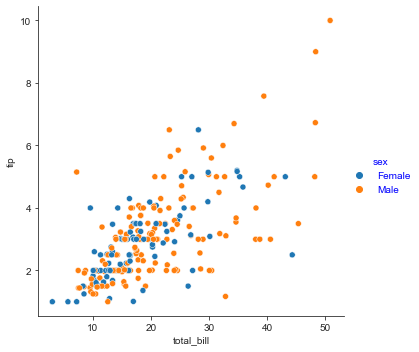

In [186]:
# Overwrite styles
sns.set_style("ticks", {"text.color": 'blue'})
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

Lastly, we can also use `sns.set(...)` to tweak our plots, such as font size scaling.

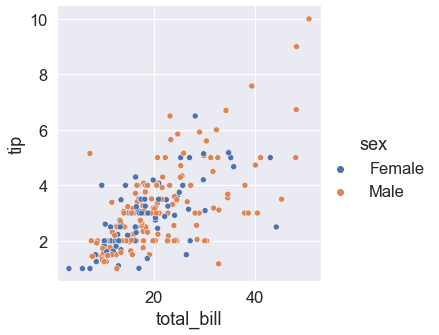

In [188]:
# Overwrite styles
sns.set(font_scale=1.5)
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

## Saving Plots
Typically, an analysis pipeline won't run in Jupyter, or any other interactive environment, but as a script that generates a report. We can use `seaborn` to this end by saving our plots.

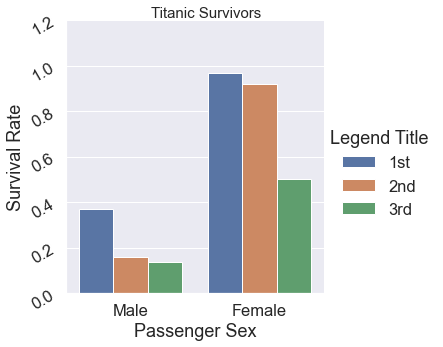

In [190]:
myFigure = sns.catplot(
    x="sex", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], 
    order=["male", "female"], data=titanic, ci=None)
myFigure.fig.suptitle("Titanic Survivors", fontsize=15)
myFigure._legend.set_title("Legend Title")
myFigure._legend.texts[0].set_text("1st")
myFigure._legend.texts[1].set_text("2nd")
myFigure._legend.texts[2].set_text("3rd")
myFigure.set_axis_labels(x_var="Passenger Sex", y_var="Survival Rate")
myFigure.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, y: "{:.0f}%".format(x*100)))
myFigure.set_xticklabels(labels=["Male", "Female"])
myFigure.set_yticklabels(rotation=30)

# Save the plot in all its glory
myFigure.savefig("output.png") #save figure in png format

`seaborn` supports saving both in bitmap format, e.g. PNG, as well as in vector format, e.g. PDF.

## Exercises

1. Using the full diamond dataset again, use a bar plot to determine how many dimaonds there are of each clarity. 

Create facets for the cut (columns) and color (rows)

Hence, each graph shows the number of diamonds (count) for each type of clarity 
and you will have multiple graphs arranged by columns (for cuts) and rows (for colors)

In [ ]:
###

In [197]:
diamonds
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


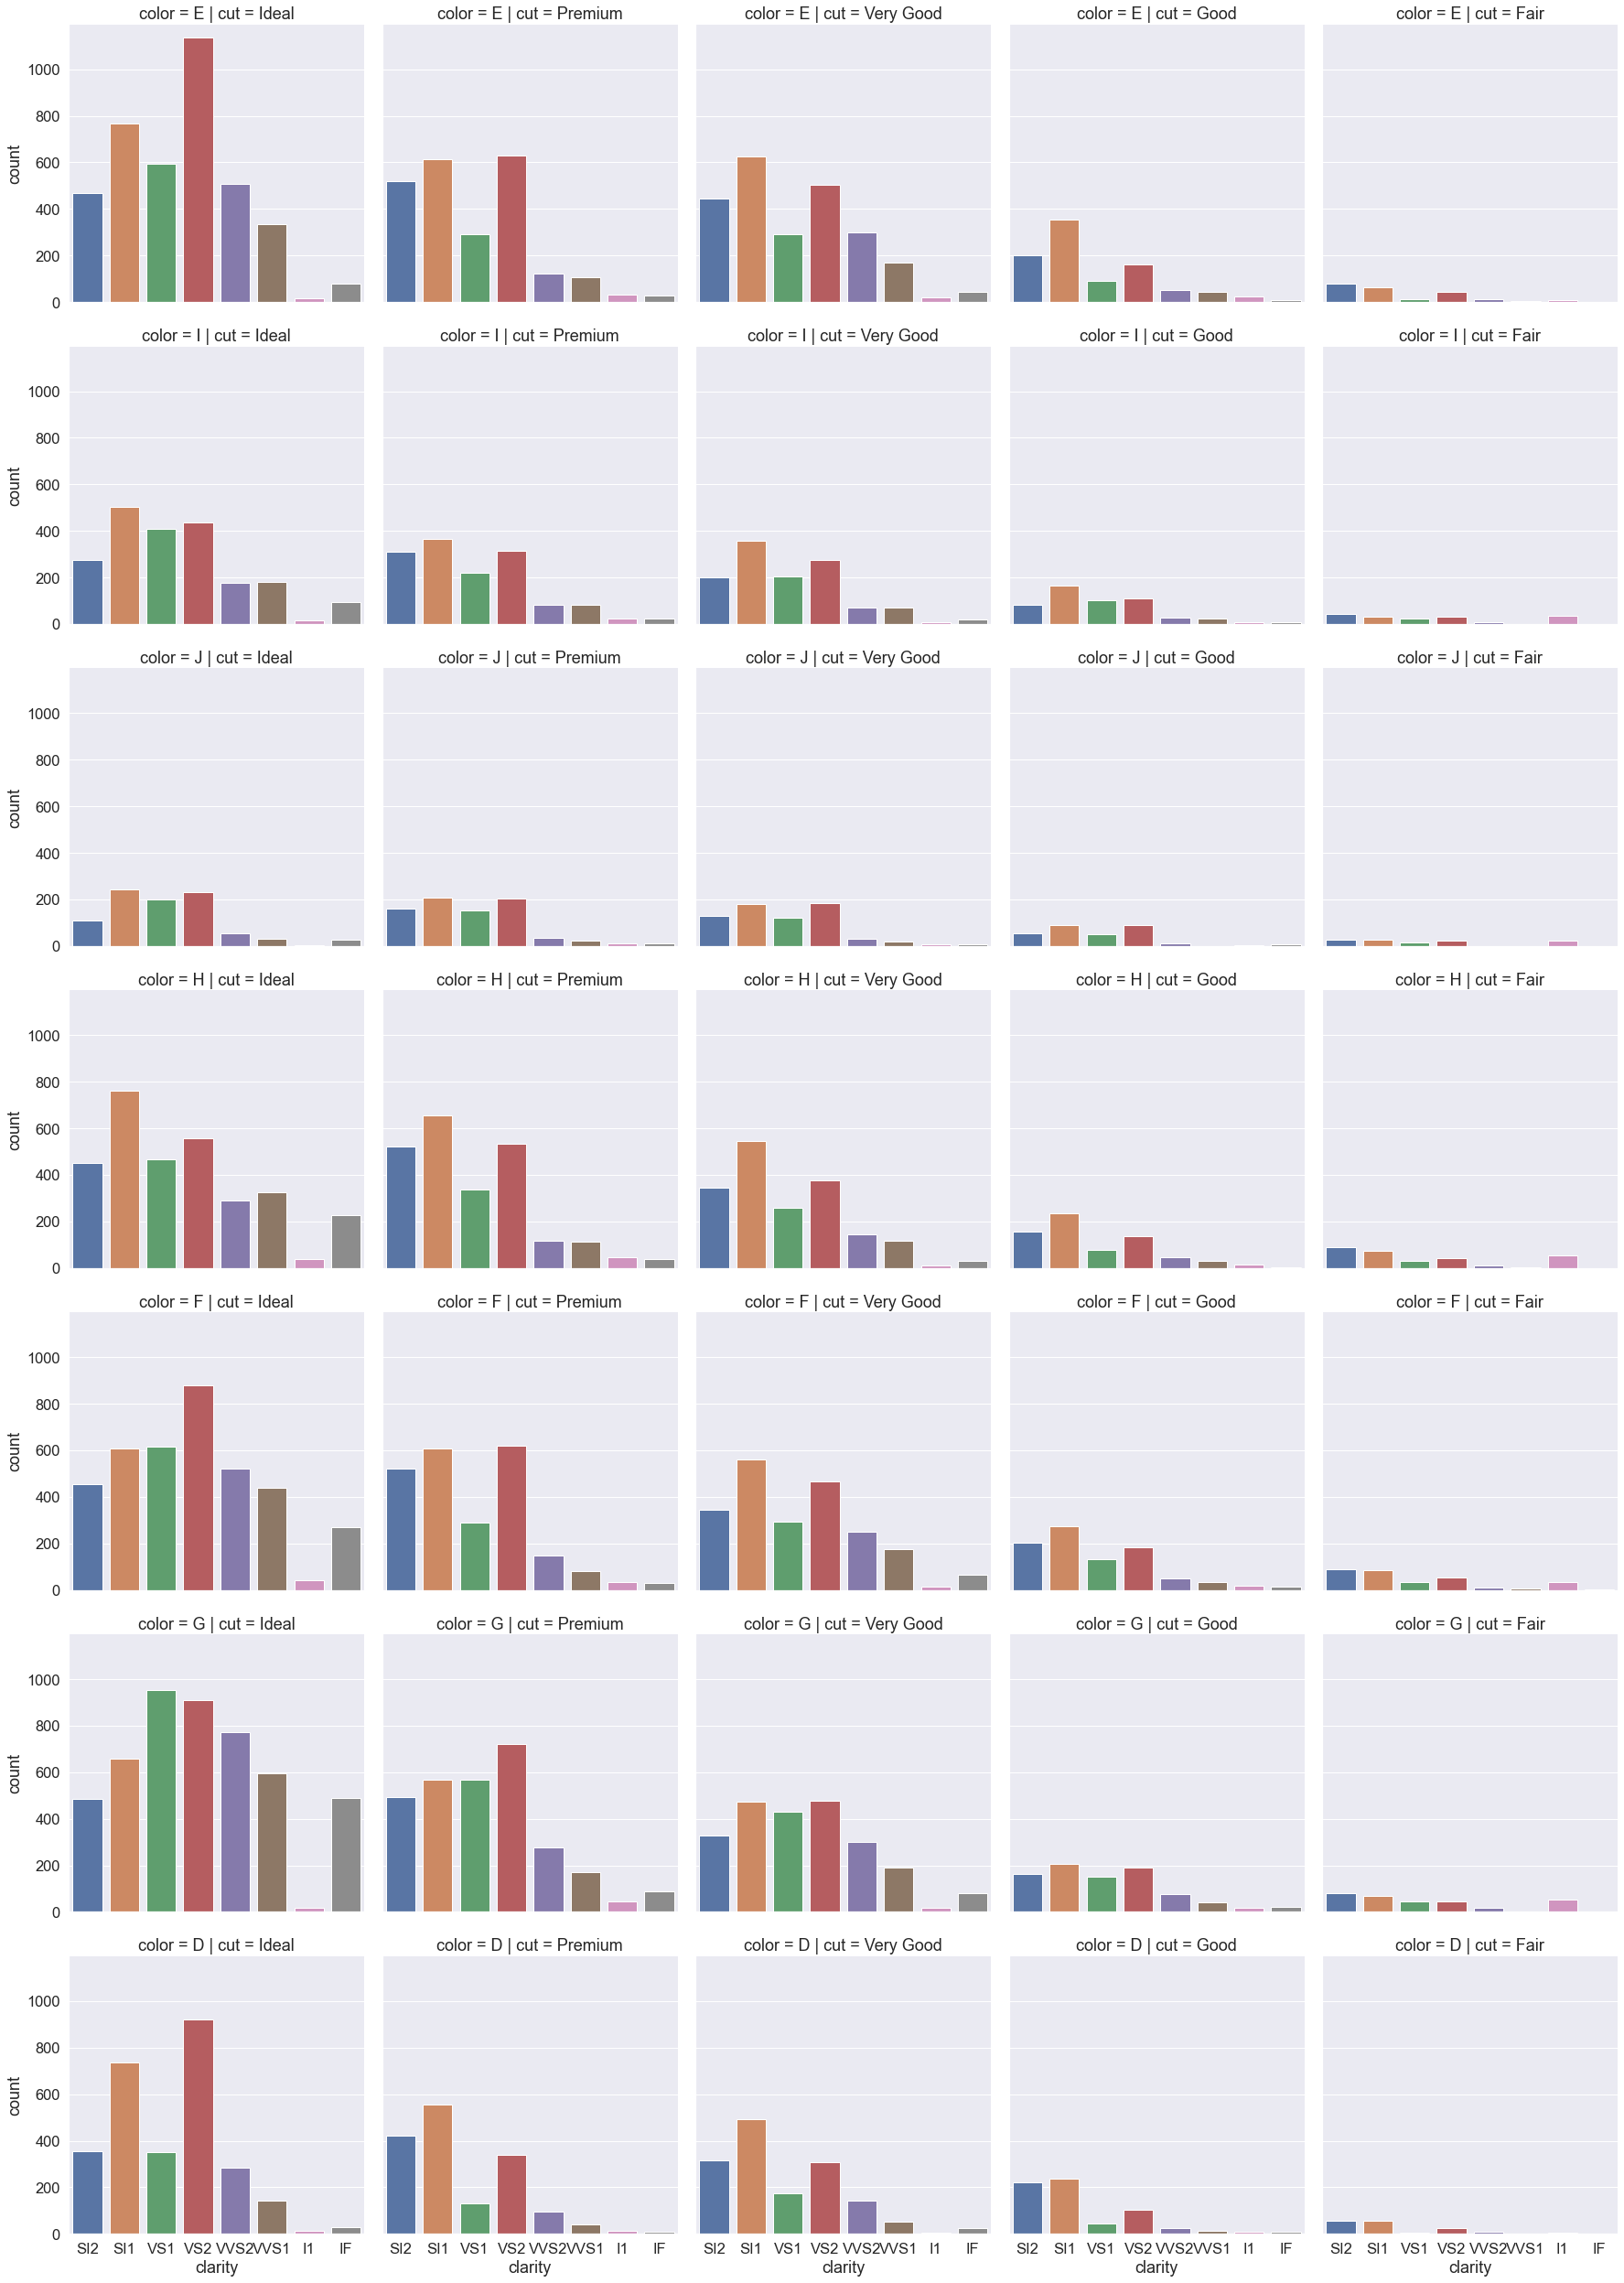

In [201]:
#2024
#sns.relplot(x="total_bill", y="tip", hue="sex", row="day", col="smoker", data=tips,  row_order=["Thur", "Fri", "Sat", "Sun"])

sns.catplot(y=None, x="clarity", kind="count", row="color", col="cut", data=diamonds, 
            col_order=["Ideal","Premium", "Very Good", "Good", "Fair"])

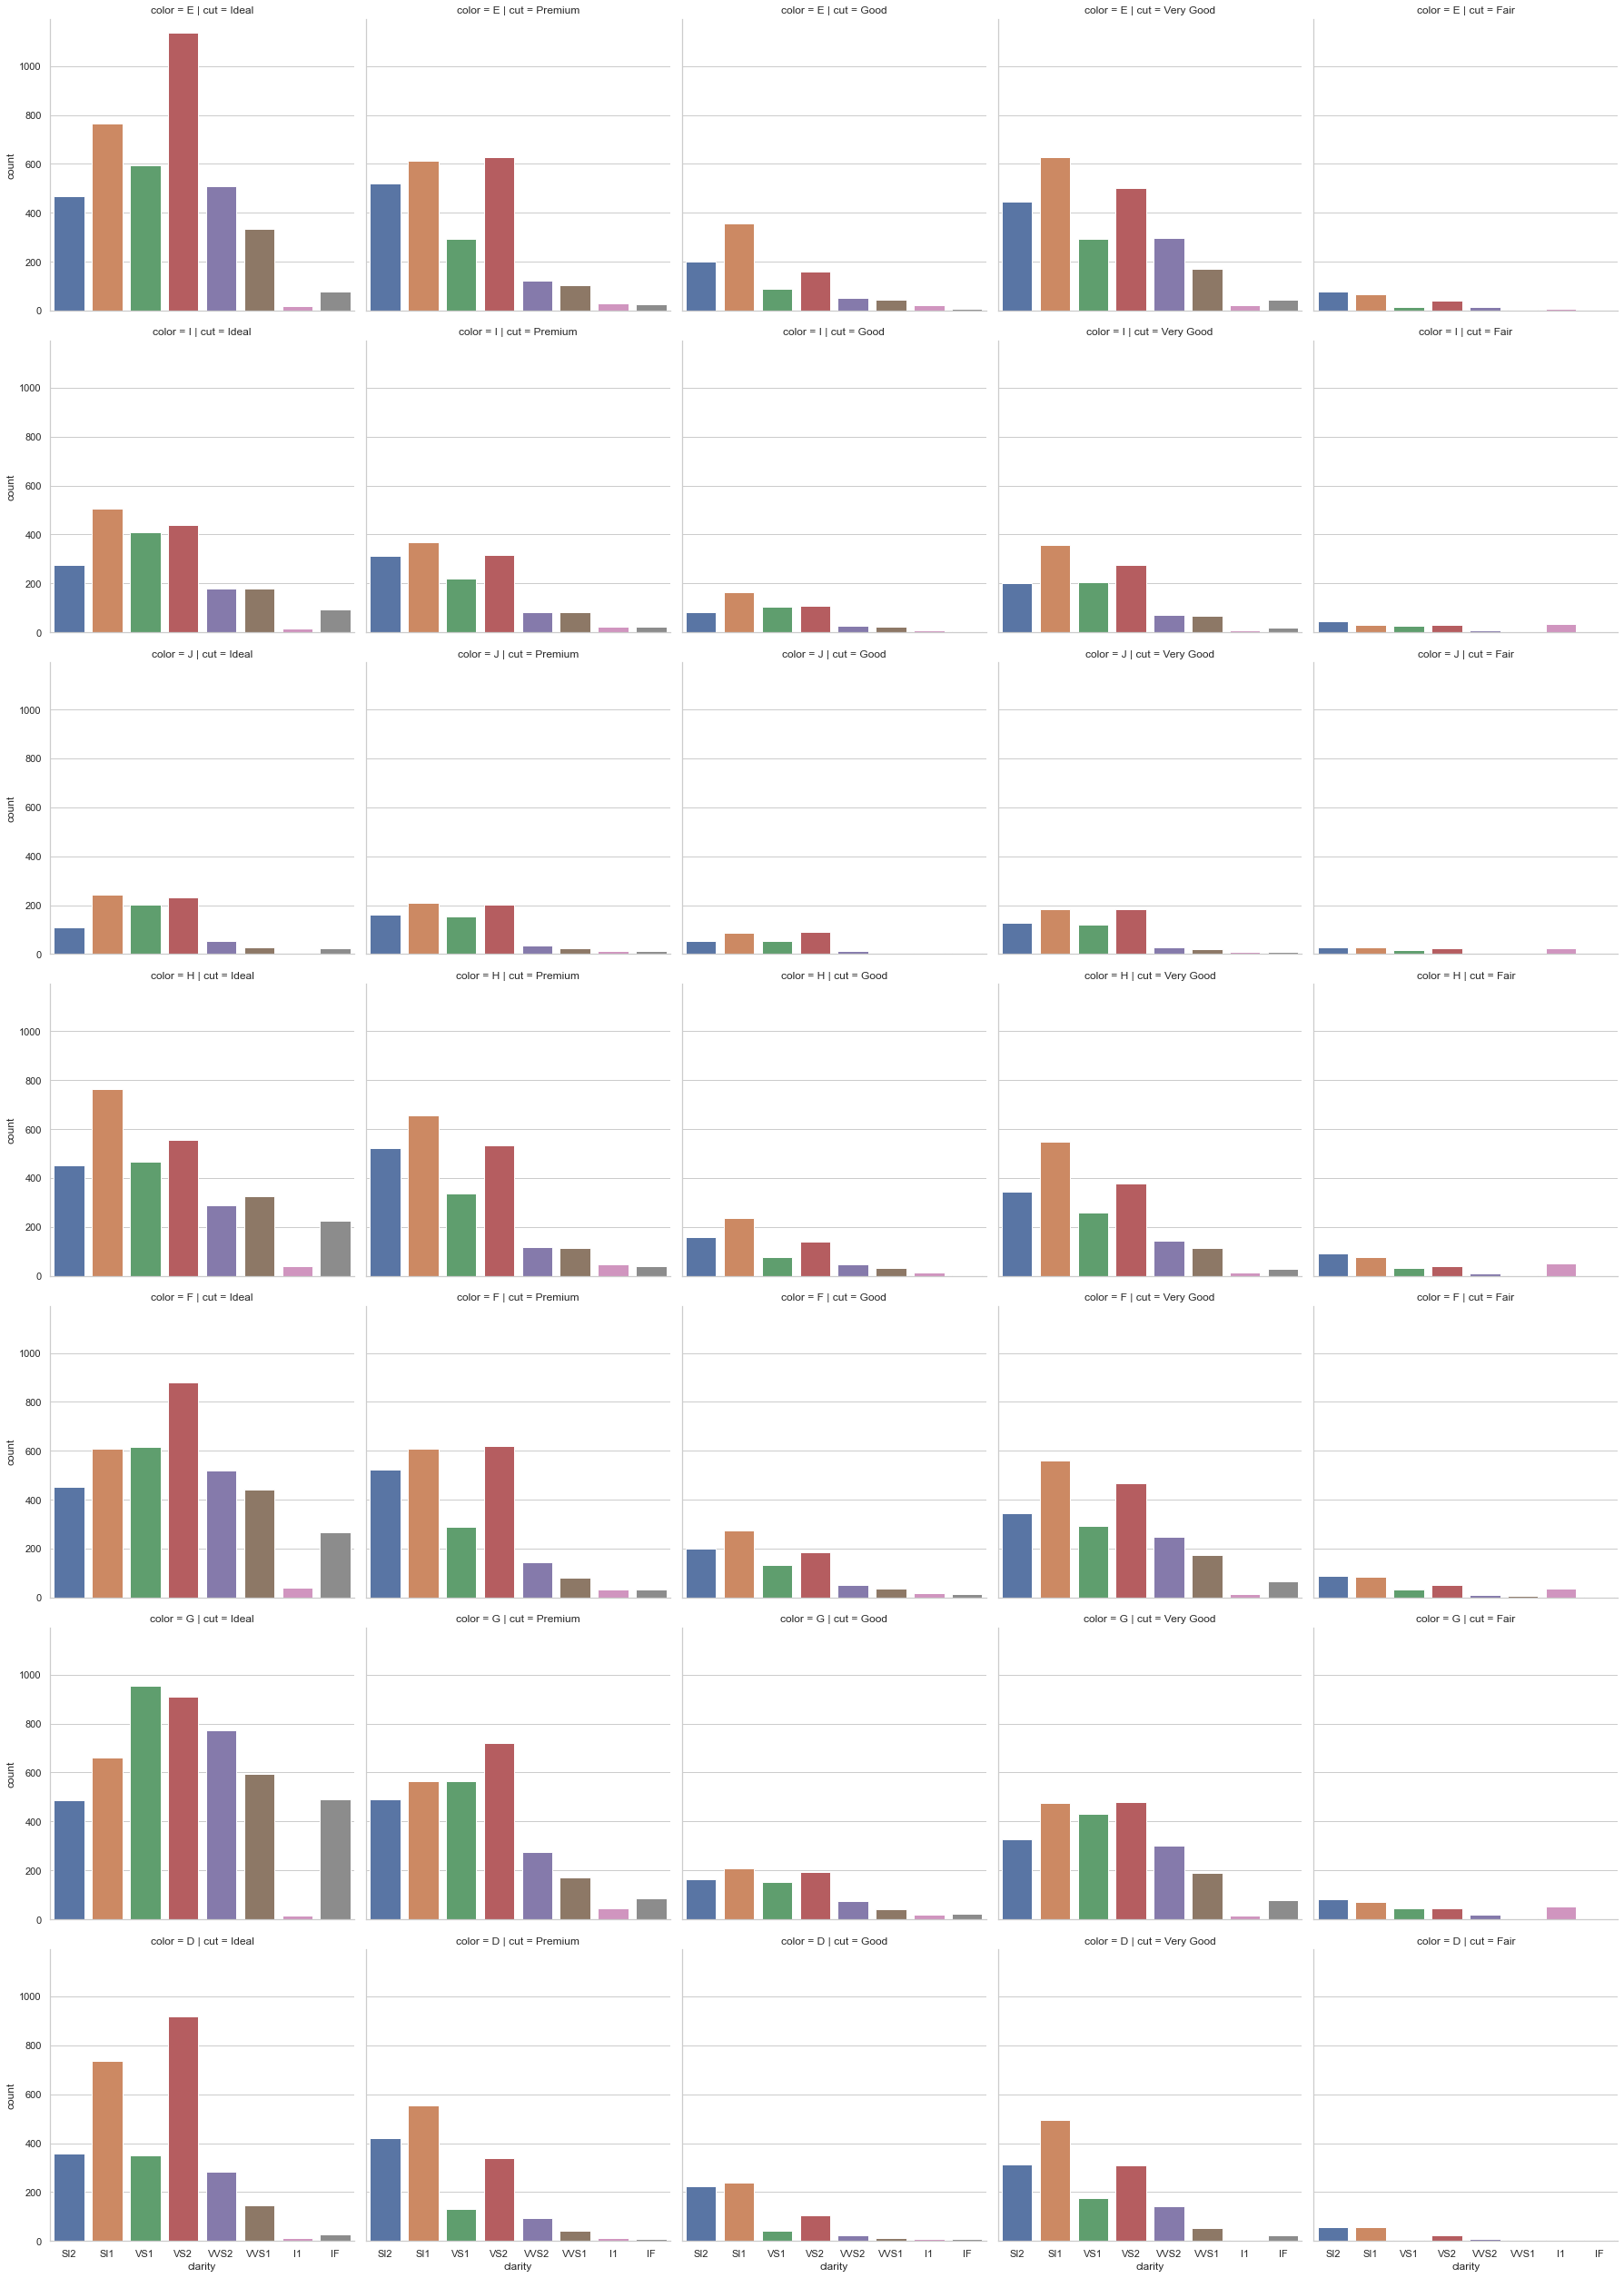

In [422]:
sns.catplot(y=None, x="clarity", kind="count", row= "color", col="cut", ci= None, data=diamonds)

2. Create a box plot that relates the carats to the clarity and place the boxes in the correct order (I1 , SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

In [ ]:
###

In [349]:
diamonds
diamonds.head()

,level_0,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


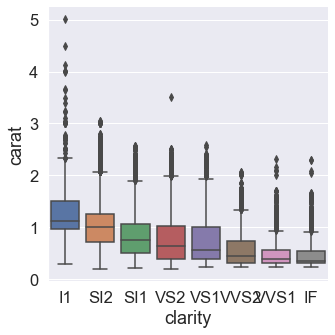

In [204]:
#2024
sns.catplot(y="carat", x="clarity", kind="box", ci= None, data=diamonds,
           order=["I1" , "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

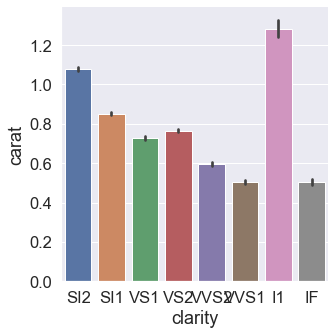

In [212]:
sns.catplot(x="clarity", y="carat", kind="bar",data=diamonds)

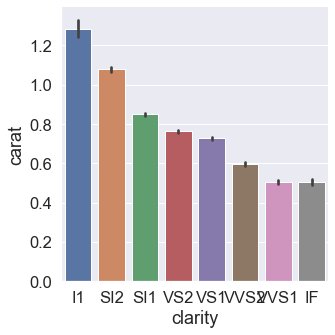

In [213]:
sns.catplot(x="clarity", y="carat", kind="bar",order=["I1" , "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],data=diamonds)

3. Plot the relationship between the `x` and `y` columns of the `diamonds` dataframe. Limit the x-axis to the interval \[3, 11] and the y-axis to the interval \[0, 15] to remove outliers

(0.0, 15.0)

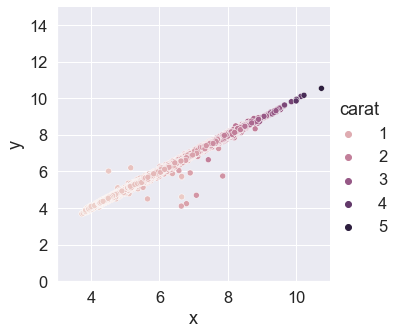

In [208]:
### 2024
sns.relplot(x="x", y="y", data=diamonds, hue="carat")
plt.xlim(3, 11) #limit x-axis
plt.ylim(0, 15) #limit y-axis

(0.0, 15.0)

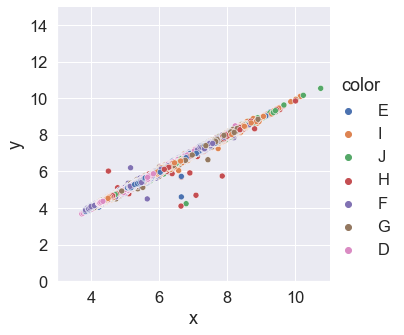

In [209]:
sns.relplot(x="x", y="y", hue="color",data=diamonds)
plt.xlim(3, 11)
plt.ylim(0, 15)

4. Plot the relationship between the price and the cut as a boxplot. Format the y-axis tick labels to include a currency symbol and to display prices in thousands, e.g. 12500 should be displayed as "\$12.5k".

  **TRY THIS**: "\$0.0k" is a little silly to display. Alter the function so that in case the y-value == 0, it only displays "\\$0"

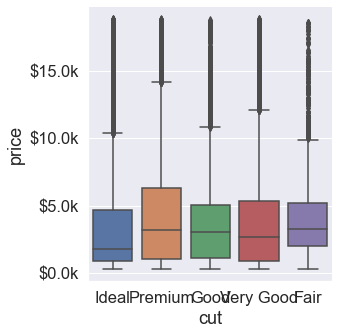

In [230]:
# MC
def currency_formatter(num, tick_num):
    return "${}k".format(num / 1000)
    
dfig = sns.catplot(data=diamonds, x="cut", y="price", kind="box")
dfig.ax.yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

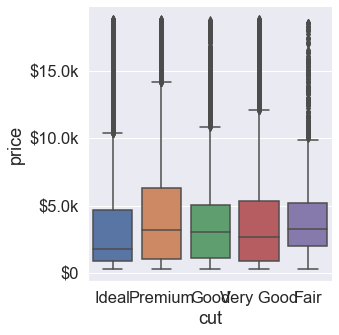

In [231]:
# MC
def currency_formatter(num, tick_num):
    if num == 0:
        return "$0"
    return "${}k".format(num / 1000)
    
dfig = sns.catplot(data=diamonds, x="cut", y="price", kind="box")
dfig.ax.yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter))

4. Load the `exercise.csv` dataset. 
  1. Plot the relationship between the pulse and diet as a boxplot. 
  2. Map the kind of exercise to the `hue`
  3. Facet the data into columns so that we have one plot for each timepoint

In [ ]:
##

In [211]:
exercise = pd.read_csv("../data/exercise.csv")
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


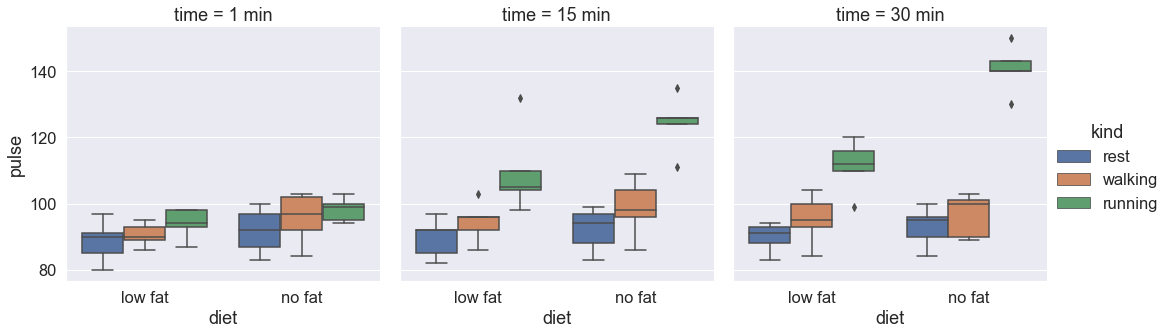

In [228]:
# 2024

sns.catplot(y="pulse", x="diet", kind="box", hue="kind", data=exercise, col= "time")

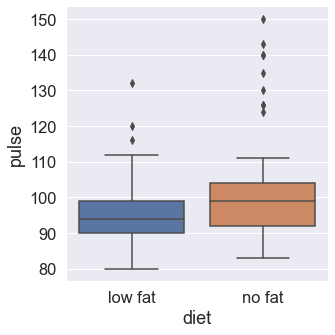

In [225]:
#A
sns.catplot(x="diet", y="pulse", kind="box", ci=None, data=exercise)

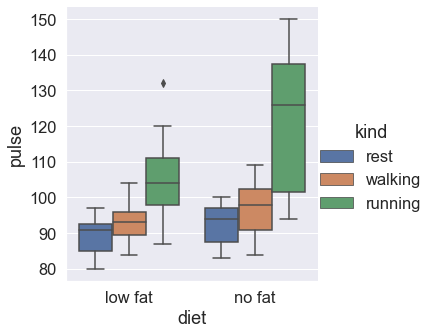

In [226]:
#B
sns.catplot(x="diet", y="pulse", kind="box", hue="kind", ci=None, data=exercise)

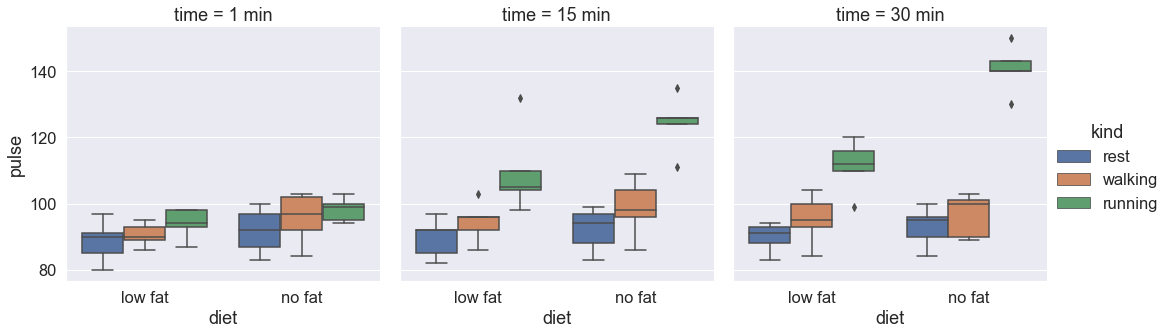

In [227]:
sns.catplot(x="diet", y="pulse", kind="box", hue="kind", col="time", ci=None, data=exercise)

In [ ]:
## Optional Demo (If timer permits)
#  To show can have horizontal bar charts, provided your data is summarised 

In [232]:
df = pd.DataFrame({'City':['Seoul','New York City','Shanghai','London','Chicago','Toronto','Mexico City','Seattle','Beijing','Las Vegas'], 
'Number of Starbucks': [284,277,256,202,164,160,160,142,137,136]})
df

,City,Number of Starbucks
0,Seoul,284
1,New York City,277
2,Shanghai,256
3,London,202
4,Chicago,164
5,Toronto,160
6,Mexico City,160
7,Seattle,142
8,Beijing,137
9,Las Vegas,136


In [233]:
sns.set(rc={"figure.figsize":(60,48)}) #let us set the size of the chart — width of 10 units and height of 12 units

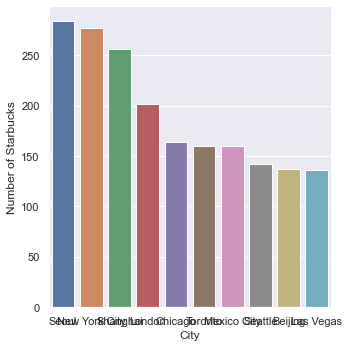

In [235]:
sns.catplot(x="City", y="Number of Starbucks",  kind="bar", data=df)

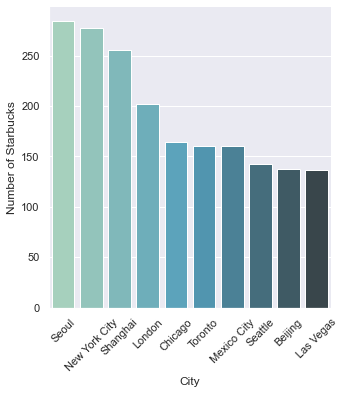

In [238]:
sFigure=sns.catplot(x="City", y="Number of Starbucks",  kind="bar", data=df, palette="GnBu_d")
sFigure.set_xticklabels(rotation=45)

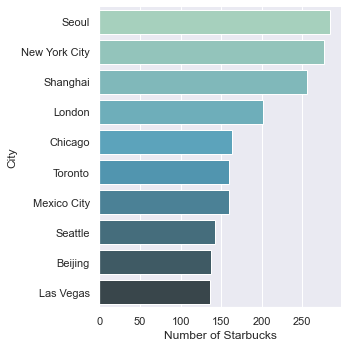

In [240]:
#change x, y axis
sns.catplot(y="City", x="Number of Starbucks",  kind="bar", data=df, palette="GnBu_d")

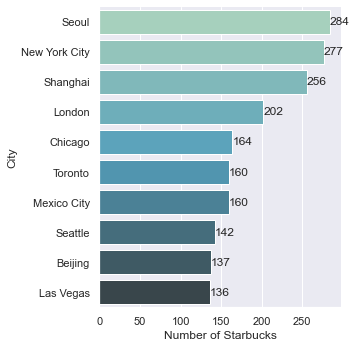

In [242]:
# MC
#print the number of Starbucks as a label against each bar in the bar chart. 

myFigure = sns.catplot(
    y="City", x="Number of Starbucks",  kind="bar", data=df, palette="GnBu_d")

initialx=0
ax = myFigure.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:1.0f}".format(p.get_width()))
    initialx+=1

Here is an explanation of what happens:
We use the text method to print a text label in a particular position in the chart object.

In order to do this for each bar, we will create a loop and print the respective label at the end of each loop

We now need to determine two (actually three) attributes within each run of the loop : 
    i. the value of the label (i.e. the number of outlets), and 
    ii.The positional parameters (x and y) determining the position (just outside the bar) at which we should print this label
    Every bar (and its corresponding background area) is known as a patch within the bar chart object. 
    Therefore, we create a loop iterating through every patch within patches

The ax.text() method requires (for our purpose) these three parameters.
x: x co-ordinate of the label. In this case, we need to display the label just after the end of each bar. Therefore, we provide the width of each bar as one parameter.
y: y co-ordinate of the label. Similar to above, we would like to center the label within each bar. For that, we need to provide the height of each bar in this case.
s: the text string to be printed. This should be the same as the value of the bar width in this case. This number is formatted as float with 0 digits of precision “{:1.0f}”

An important fact to remember — the x, y starts at 0,0 from the top left of the chart object, not the typical bottom left corner we are used to working with whenever we graph co-ordinates. Therefore, keeping this in mind, we create another variable initialx, which starts at 0, and then gets incremented by 1 in each step of the loop.

Let me provide you my staircase analogy: think of this whole process as descending a staircase. In each step (of the staircase, as well as the loop):
We advance our feet to the edge of the stair (this is the width parameter)
We write our ‘label’ just outside this step (imagine yourself twirling your foot for a second)
We descend one step , and initialx gets incremented by 1,
And then start the process all over again

One other point — the height and placement of the label would be the height of the bar chart and to adjust the position to show at the center, we start at 1/8th of the bar height to make sure the text is positioned in the middle of the bar.
Why 1/8th? 
I arrived at this after some trials, but then figured out that what actually happens is that the height of each bar is 1 inch (think of it as one unit) by default. 
Since, for visual purposes, there is some padding (or a gap) between different bars, I understood that the bar took up 80 % (or 0.8) of the bar height. The 1/8th of the bar height is a way to get the text to draw in such a way that it looks centered

Ref: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6 

<center><b>Open Exercise</b></center>

5. Using the dataset `tips`, plot any relationship between variables you find worth investigating and make the figure "presentation-ready". That means:
  - Use aesthetics (`hue`, `style`, `size`) and facets where appropriate. 
  - Create a figure title and label the axes and legend. 
  - Format tick marks if necessary.
  - Edit tick labels and legend entries if necessary.
  - Find a visually appealing color palette.
  - Choose one of the base themes and play around with the options to them until they are to your liking.
  
  Save your plot as "output.png" and "output.pdf" and compare the two images. What happens to them when you zoom in very close?

In [ ]:
###

In [229]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


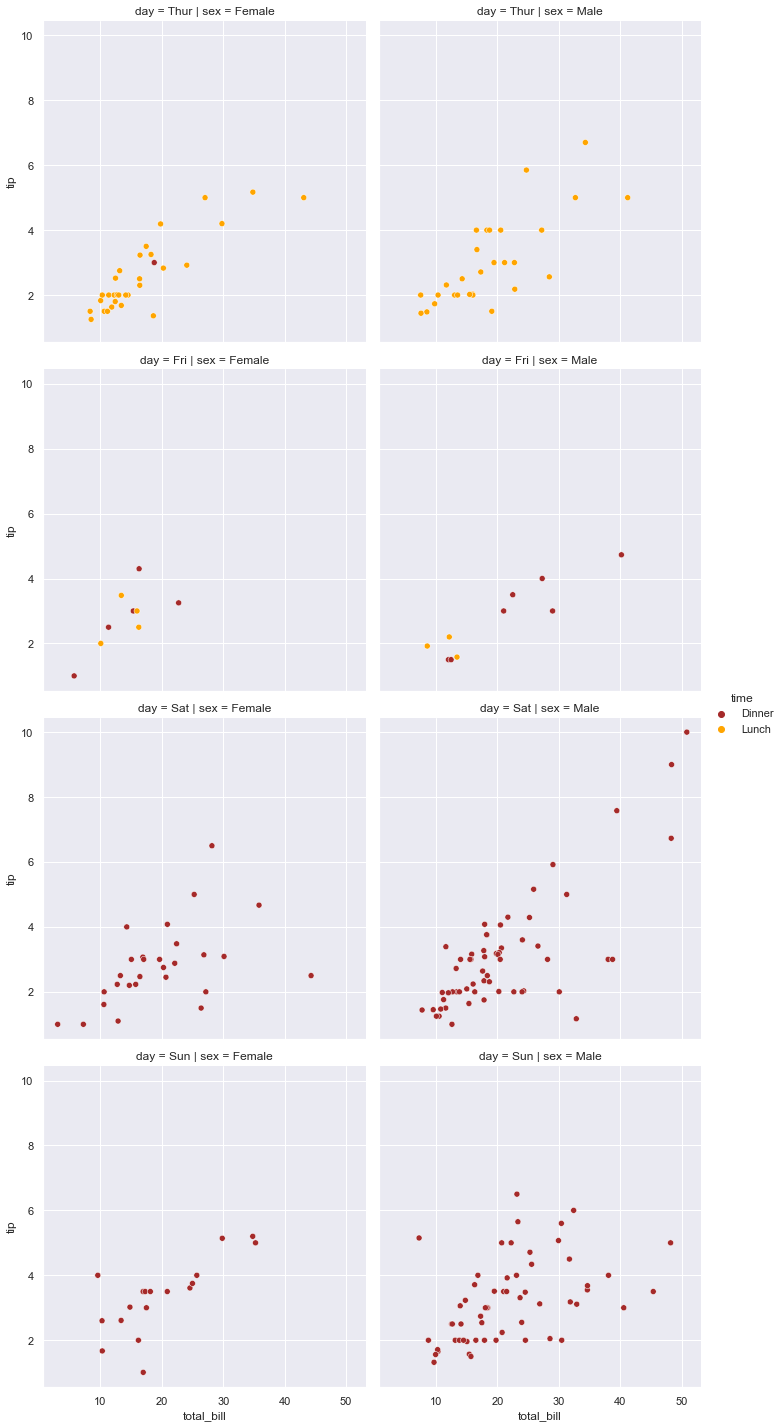

In [254]:
TipsFigure = sns.relplot(x="total_bill", y="tip",hue ="time", col="sex",row="day",
            row_order=["Thur", "Fri", "Sat", "Sun"], data=tips, palette=["brown", "orange"])

TipsFigure.savefig("TipsDay.png") #save figure png
TipsFigure.savefig("TipsDay.pdf") #save figure pdf

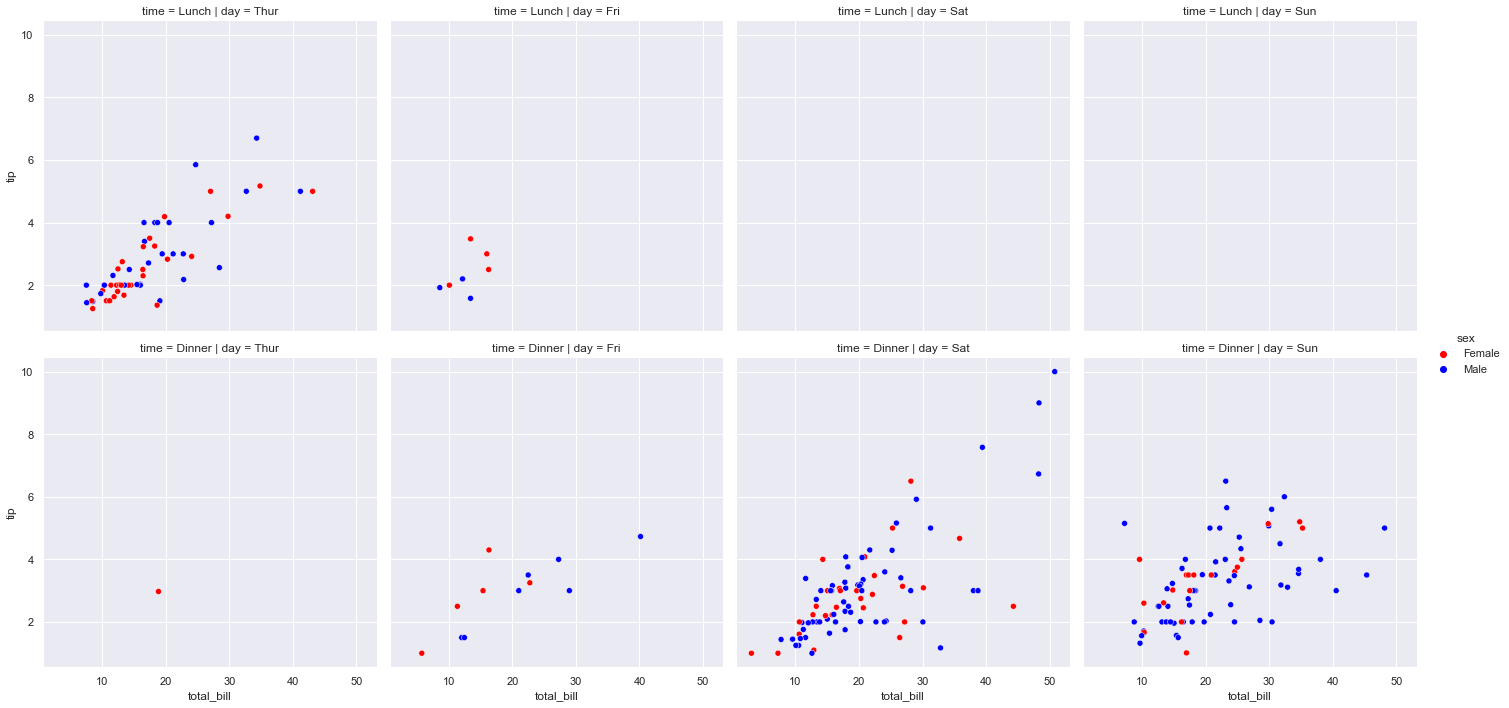

In [251]:
TipsFigure = sns.relplot(x="total_bill", y="tip",hue ="sex", col="day",row="time",
            col_order=["Thur", "Fri", "Sat", "Sun"], row_order=["Lunch", "Dinner"], data=tips, palette=["red", "blue"])

TipsFigure.savefig("TipsDayTime.png") #save figure png
TipsFigure.savefig("TipsDayTime.pdf") #save figure pdf

# **<font color=red>HERE !!</font>**